In [1]:
# after we refactor some other code, we'll plot up like... 10? periodograms 
# for variables, plot em at JHK, just to see what happens.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.timeseries import LombScargle
from importlib import reload
import wuvars.plotting.lightcurve
reload(wuvars.plotting.lightcurve)

from wuvars.plotting.lightcurve import simple_lc, simple_phased_lc

In [5]:
from wuvars.data import spreadsheet, photometry

spread = spreadsheet.load_v1()
phot = photometry.load_v2()
phot_grouped = photometry.load_v2_grouped(phot)

Loading WSERV5 photometry data... DONE (elapsed time: 0.15s)
Loading WSERV7 photometry data... DONE (elapsed time: 0.18s)
Loading WSERV8 photometry data... DONE (elapsed time: 0.14s)
Loading WSERV11 photometry data... DONE (elapsed time: 0.21s)
Grouping WSERV5 photometry data... DONE (elapsed time: 2.03s)
Grouping WSERV7 photometry data... DONE (elapsed time: 2.29s)
Grouping WSERV8 photometry data... DONE (elapsed time: 1.59s)
Grouping WSERV11 photometry data... DONE (elapsed time: 2.94s)


In [6]:
%run ../variability_selection.py
%run ../brown_dwarf_selection.py

from wuvars.analysis.sidsep import sidsep

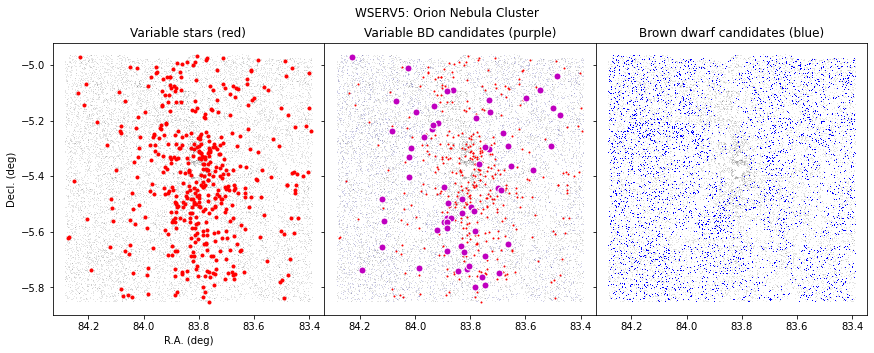

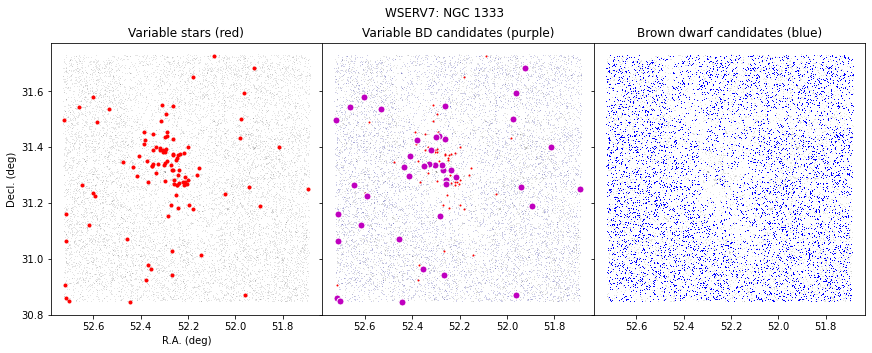

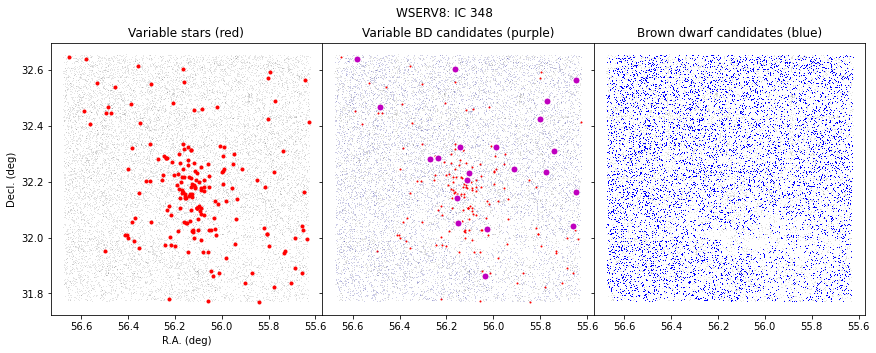

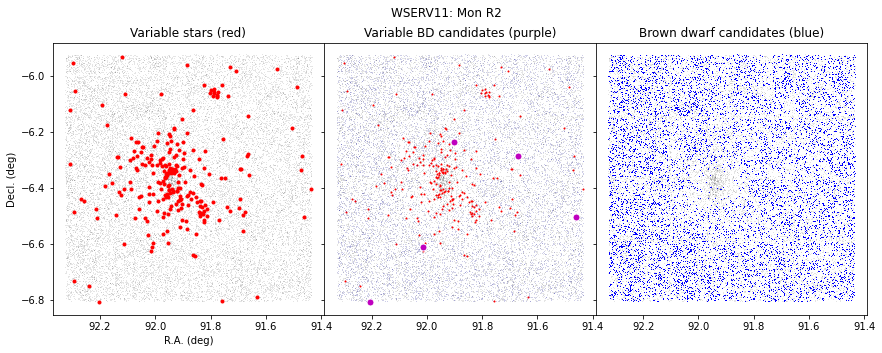

In [7]:
wserv_ids = [5, 7, 8, 11]

# n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [35, 80, 55, 65]
n_max_list = [90, 160, 80, 100]

min_Stetson_list = [3, 1.6, 1.6, 4]

SFR_names = ["Orion Nebula Cluster", "NGC 1333", "IC 348", "Mon R2"]
SFR_dict = {x: y for x, y in zip(wserv_ids, SFR_names)}

for wserv, n_min, n_max, S in list(zip(wserv_ids, n_min_list, n_max_list, min_Stetson_list)):
    
    ds = spread[f'wserv{wserv}']

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v1 = sq1_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)
    
    bd = simple_BD_select_v2(ds, wserv)

    
    fig, axes = plt.subplots(ncols=3, figsize=(14.6,5), sharex=True, sharey=True)
    
    for ax in axes:
        
        ax.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
        ax.invert_xaxis()
        
    axes[0].plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'r.')

    axes[1].plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'r.', ms=2)
    axes[1].plot(np.degrees(ds[q1 & bd]['mean']['RA']), np.degrees(ds[q1 & bd]['mean']['DEC']), 'b,', alpha=0.1)
    axes[1].plot(np.degrees(ds[v1 & bd]['mean']['RA']), np.degrees(ds[v1 & bd]['mean']['DEC']), 'mo', markeredgecolor='w', ms=7)

    axes[2].plot(np.degrees(ds[q1 & bd]['mean']['RA']), np.degrees(ds[q1 & bd]['mean']['DEC']), 'b,')
    
    fig.suptitle(f"WSERV{wserv}: {SFR_dict[wserv]}")
    
    axes[0].set_title("Variable stars (red)")
    axes[1].set_title("Variable BD candidates (purple)")
    axes[2].set_title("Brown dwarf candidates (blue)")
    
    axes[0].set_xlabel("R.A. (deg)")
    axes[0].set_ylabel("Decl. (deg)")

    plt.subplots_adjust(wspace=0)
    


Int64Index([45195940889648, 45195940889654, 45195940889671, 45195940889679,
            45195940889680, 45195940889708, 45195940889747, 45195940889748,
            45195940889807, 45195940889861, 45195940889877, 45195940889883,
            45195940889948, 45195940890003, 45195940890028, 45195940890116,
            45195940890140, 45195940890156, 45195940890212, 45195940890247,
            45195940890251, 45195940890433, 45195940890484, 45195940890550,
            45195940890671, 45195940890708, 45195940892564, 45195940893436,
            45195940897103, 45195940897670],
           dtype='int64', name='SOURCEID')
SID: 4519 5940 8896 48
FAP of J peak: 1.79e-01. Freq: 0.01 day^-1 (Period: 3199.99 hours)
FAP of H peak: 1.02e-01. Freq: 4.77 day^-1 (Period: 5.03 hours)
FAP of K peak: 4.00e-01. Freq: 11.09 day^-1 (Period: 2.17 hours)


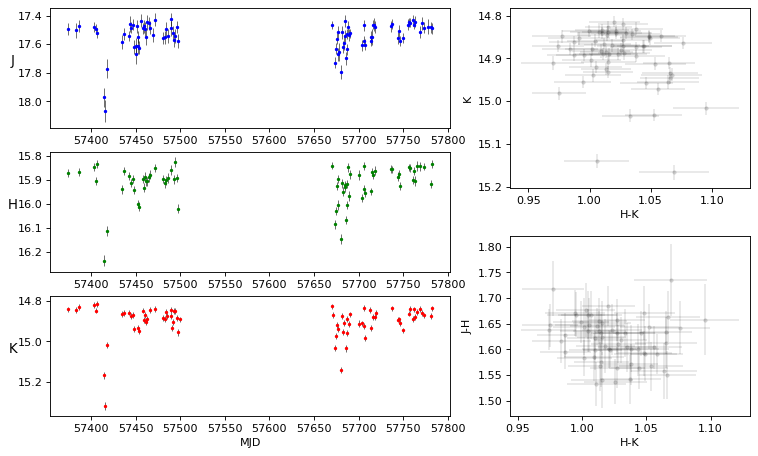

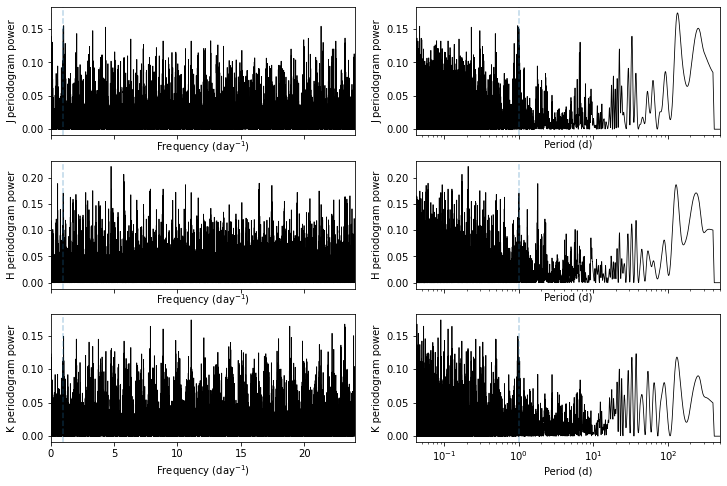

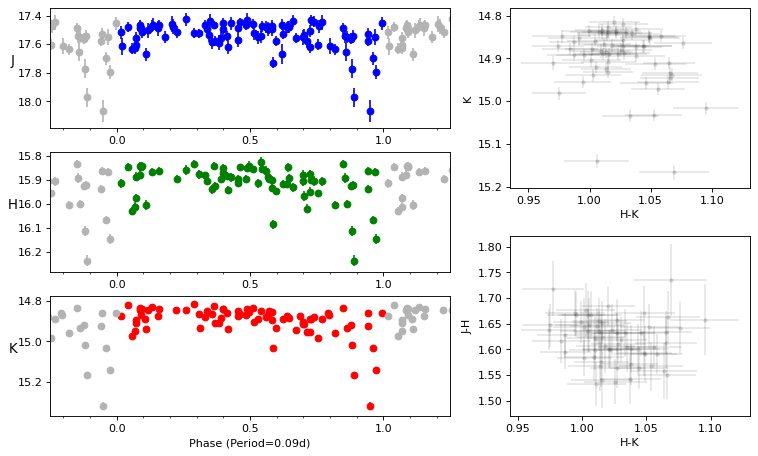

SID: 4519 5940 8896 54
FAP of J peak: 6.83e-03. Freq: 8.00 day^-1 (Period: 3.00 hours)
FAP of H peak: 3.20e-02. Freq: 0.00 day^-1 (Period: 9230.73 hours)
FAP of K peak: 4.35e-03. Freq: 4.08 day^-1 (Period: 5.89 hours)


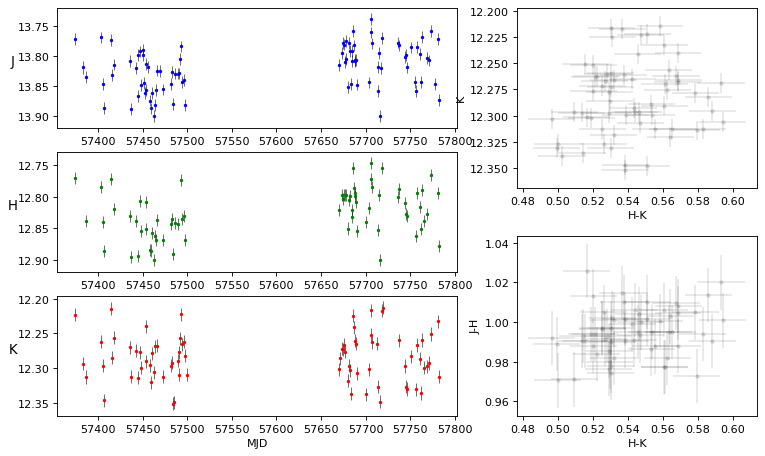

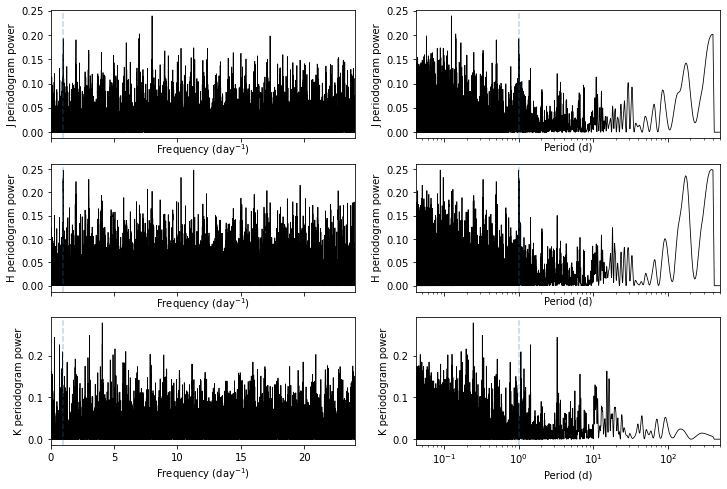

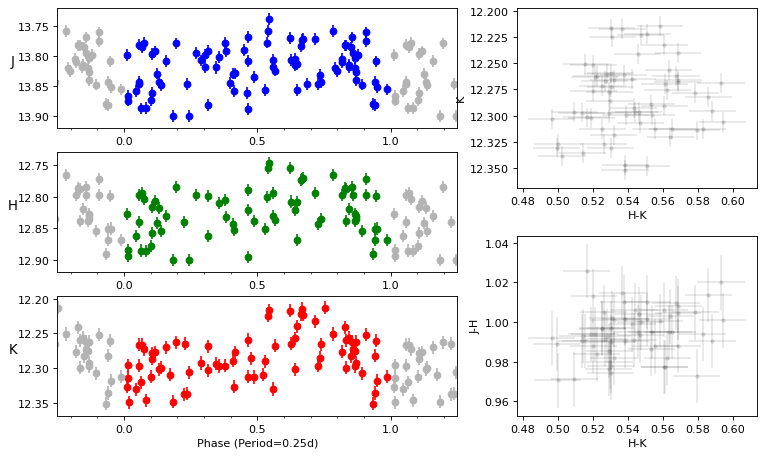

SID: 4519 5940 8896 71
FAP of J peak: 8.28e-05. Freq: 0.13 day^-1 (Period: 187.94 hours)
FAP of H peak: 8.71e-03. Freq: 8.26 day^-1 (Period: 2.91 hours)
FAP of K peak: 5.32e-03. Freq: 10.26 day^-1 (Period: 2.34 hours)


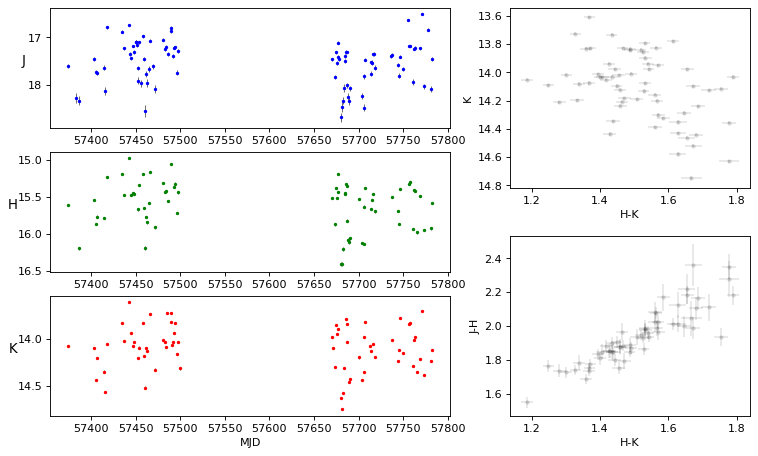

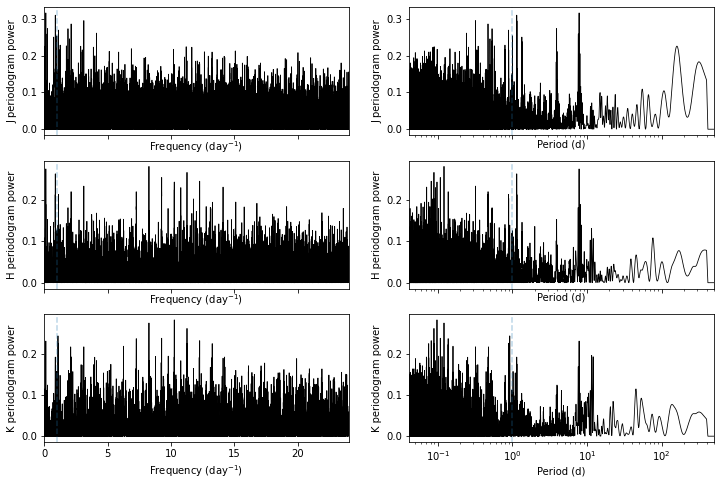

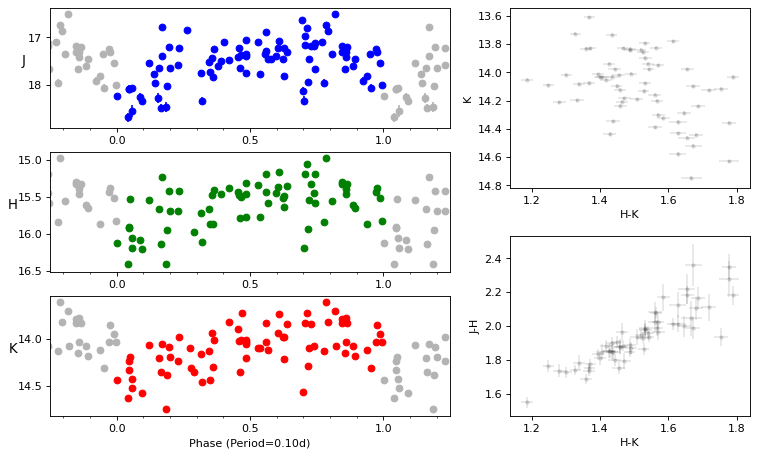

SID: 4519 5940 8896 79
FAP of J peak: 1.05e-36. Freq: 0.16 day^-1 (Period: 153.65 hours)
FAP of H peak: 2.04e-31. Freq: 0.16 day^-1 (Period: 153.65 hours)
FAP of K peak: 8.55e-30. Freq: 0.16 day^-1 (Period: 153.65 hours)


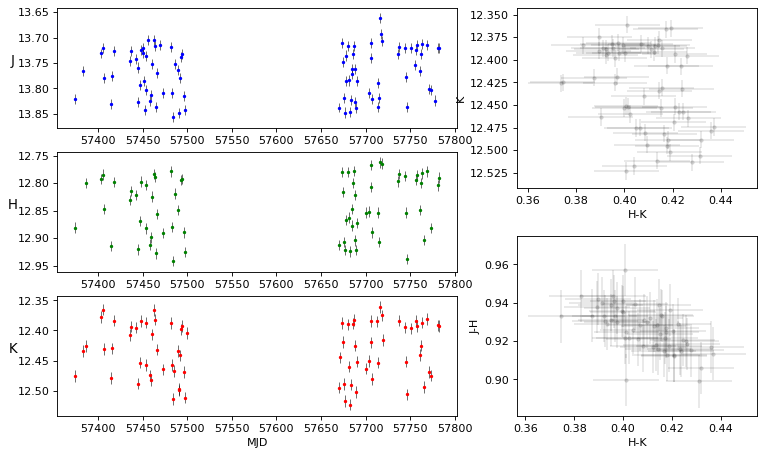

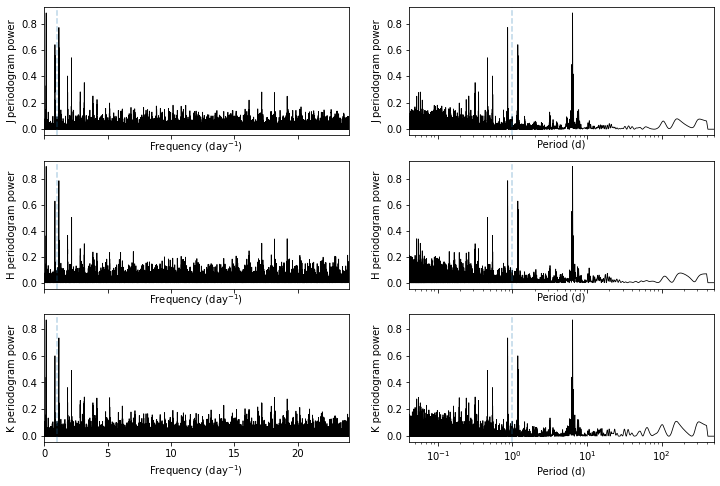

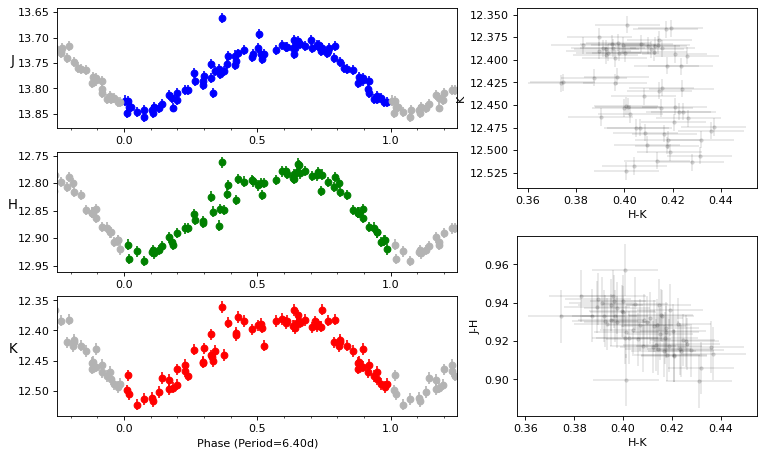

SID: 4519 5940 8896 80
FAP of J peak: 2.52e-04. Freq: 0.02 day^-1 (Period: 1121.49 hours)
FAP of H peak: 1.46e-02. Freq: 4.34 day^-1 (Period: 5.53 hours)
FAP of K peak: 4.00e-03. Freq: 4.34 day^-1 (Period: 5.53 hours)


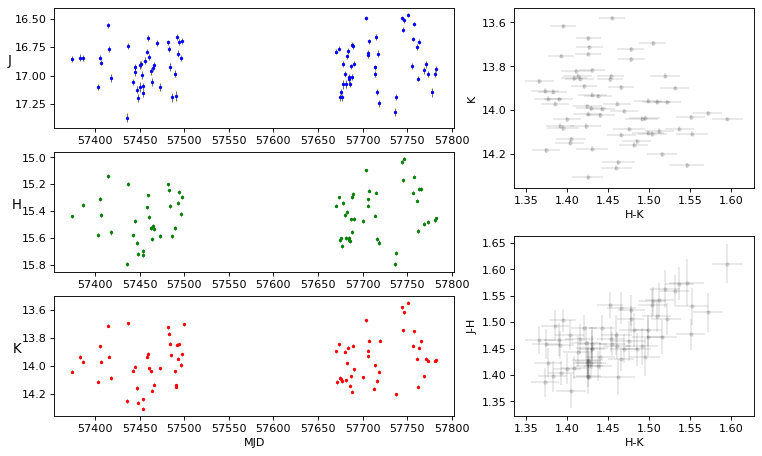

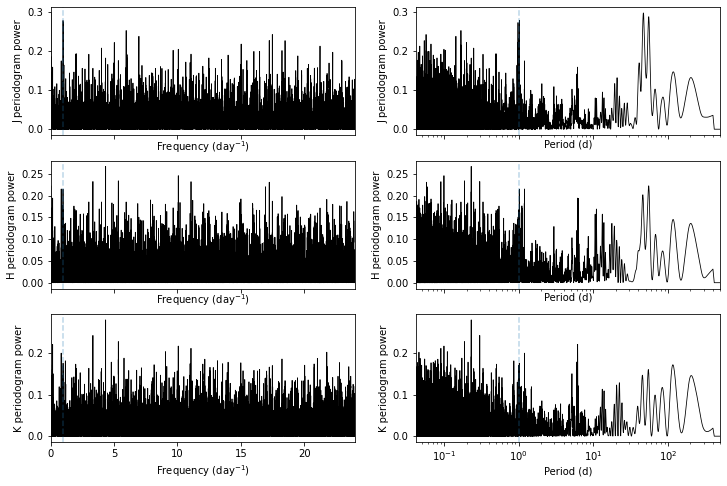

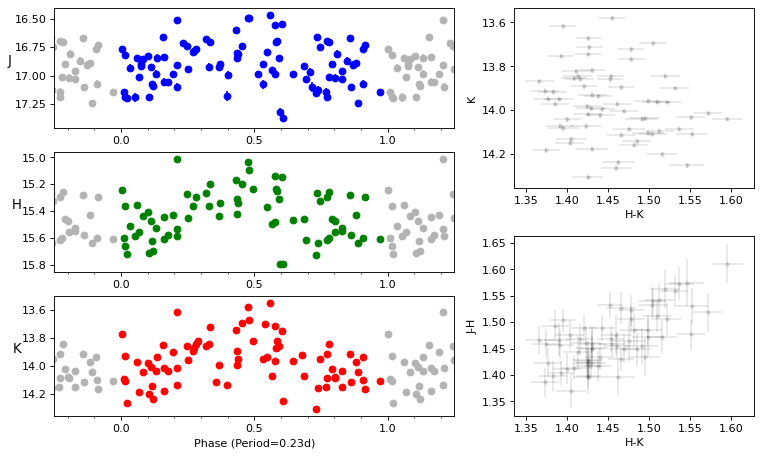

SID: 4519 5940 8897 08
FAP of J peak: 8.57e-03. Freq: 9.54 day^-1 (Period: 2.51 hours)
FAP of H peak: 1.31e-02. Freq: 6.00 day^-1 (Period: 4.00 hours)
FAP of K peak: 2.65e-04. Freq: 0.99 day^-1 (Period: 24.14 hours)


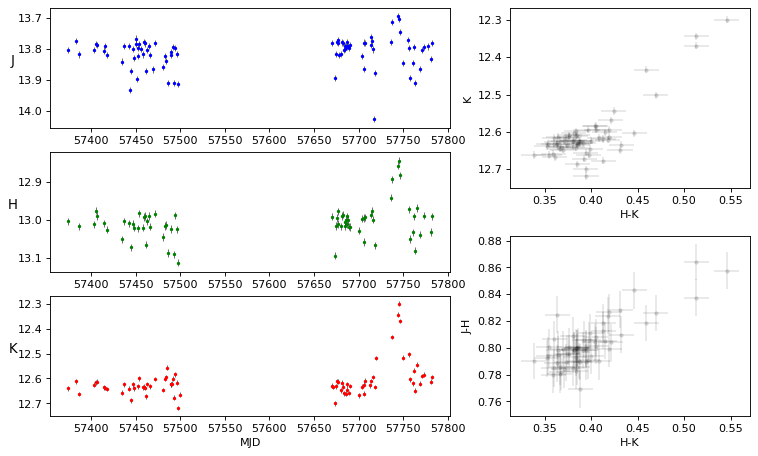

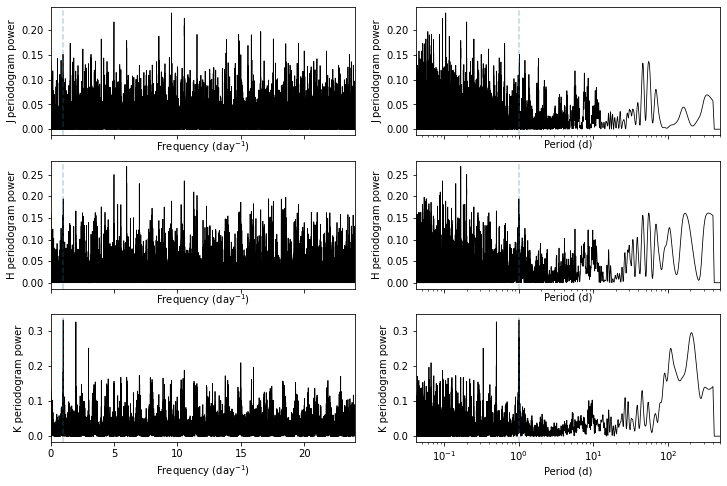

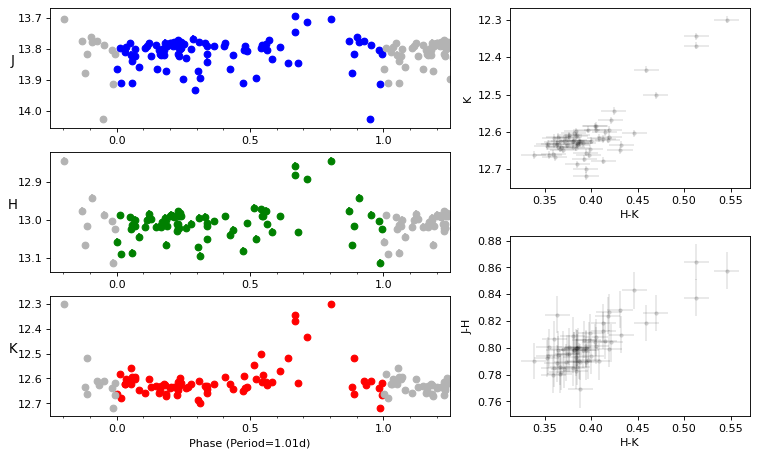

SID: 4519 5940 8897 47
FAP of J peak: 1.39e-03. Freq: 5.86 day^-1 (Period: 4.10 hours)
FAP of H peak: 5.48e-04. Freq: 5.86 day^-1 (Period: 4.10 hours)
FAP of K peak: 6.21e-06. Freq: 1.00 day^-1 (Period: 23.97 hours)


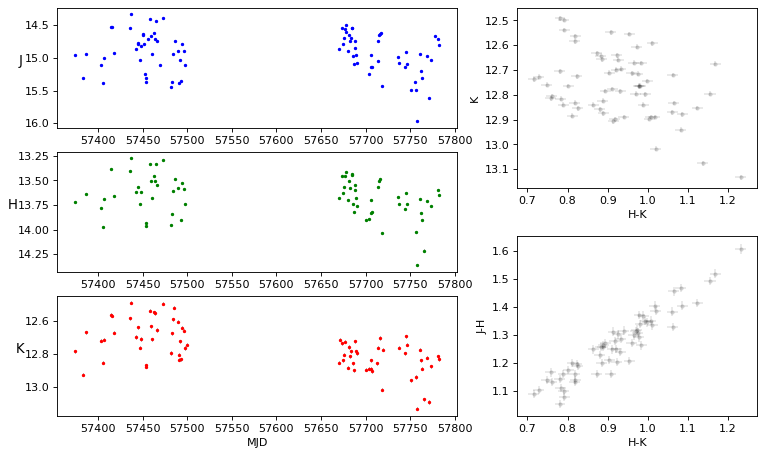

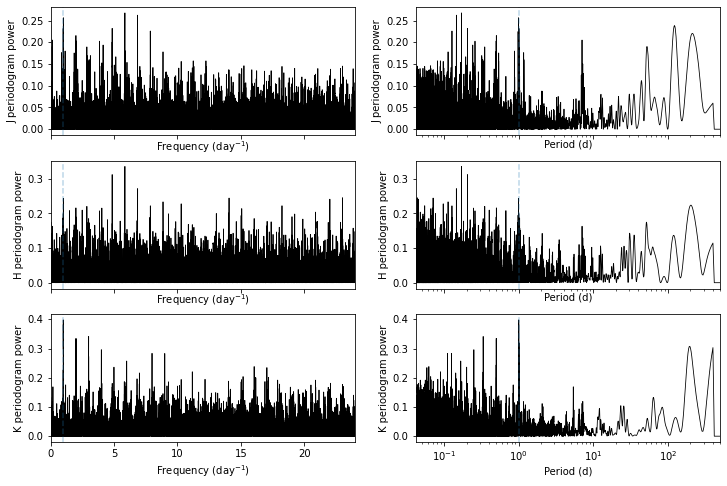

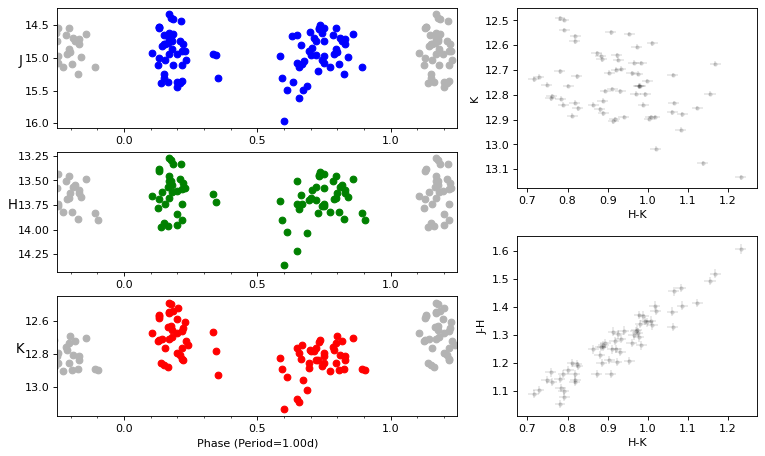

SID: 4519 5940 8897 48
FAP of J peak: 2.33e-23. Freq: 0.35 day^-1 (Period: 68.36 hours)
FAP of H peak: 8.61e-25. Freq: 0.35 day^-1 (Period: 68.36 hours)
FAP of K peak: 1.54e-24. Freq: 0.35 day^-1 (Period: 68.38 hours)


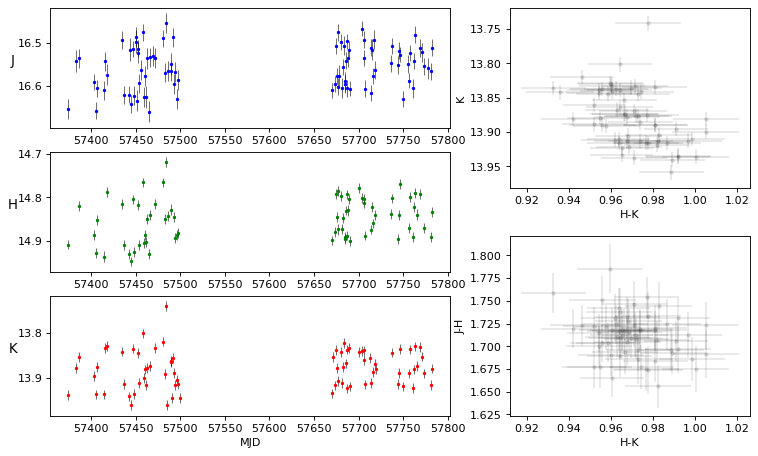

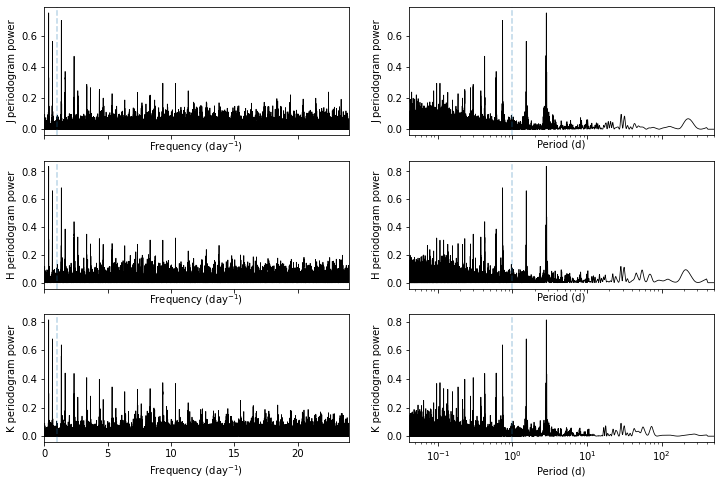

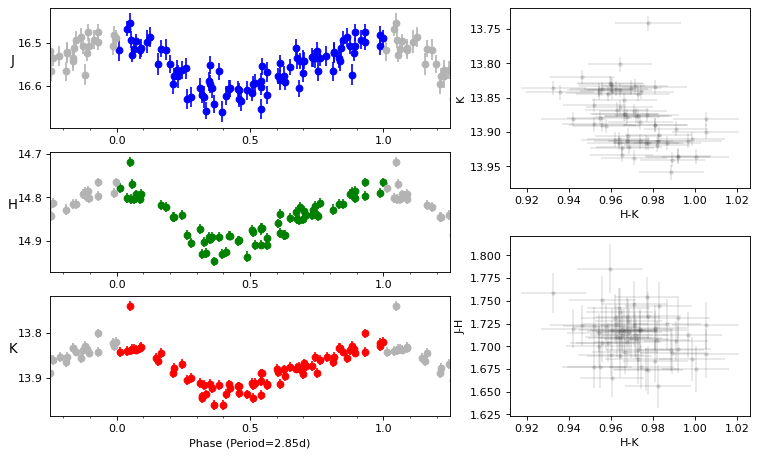

SID: 4519 5940 8898 07
FAP of J peak: 1.12e-02. Freq: 13.05 day^-1 (Period: 1.84 hours)
FAP of H peak: 2.67e-02. Freq: 2.90 day^-1 (Period: 8.27 hours)
FAP of K peak: 3.52e-04. Freq: 1.02 day^-1 (Period: 23.58 hours)


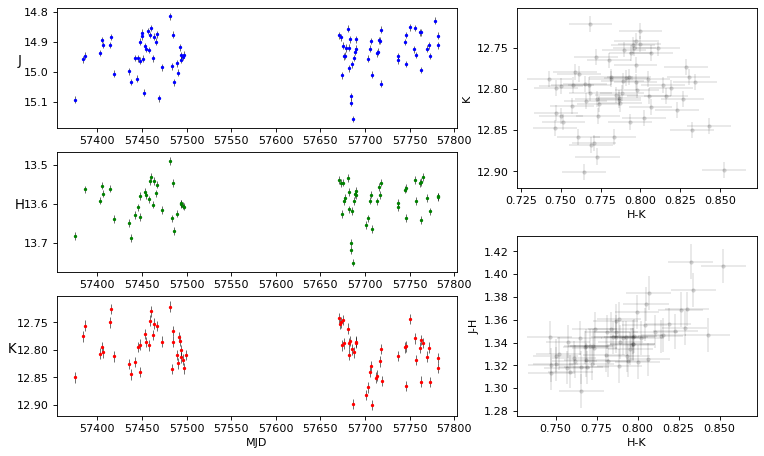

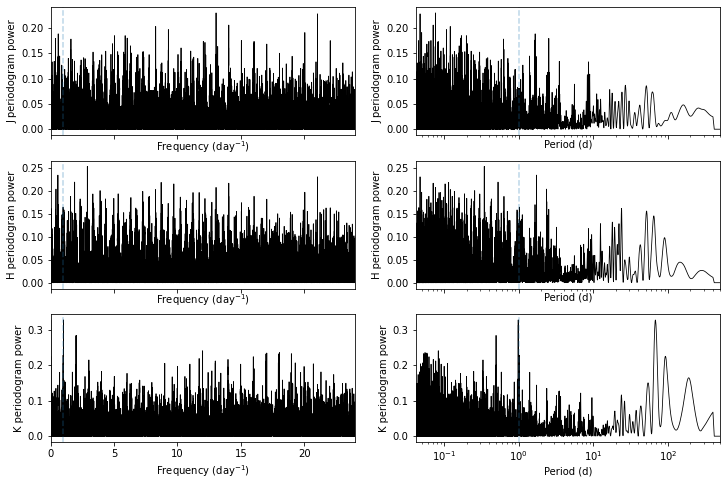

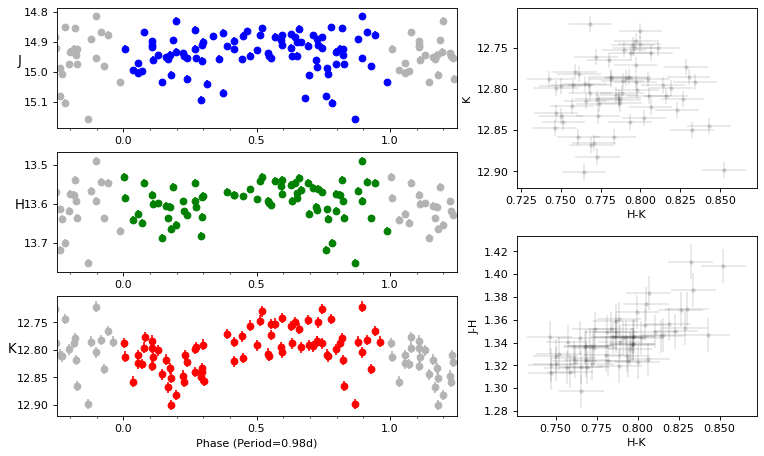

SID: 4519 5940 8898 61
FAP of J peak: 1.42e-07. Freq: 1.00 day^-1 (Period: 23.90 hours)
FAP of H peak: 1.66e-06. Freq: 1.00 day^-1 (Period: 23.90 hours)
FAP of K peak: 3.21e-02. Freq: 19.43 day^-1 (Period: 1.24 hours)


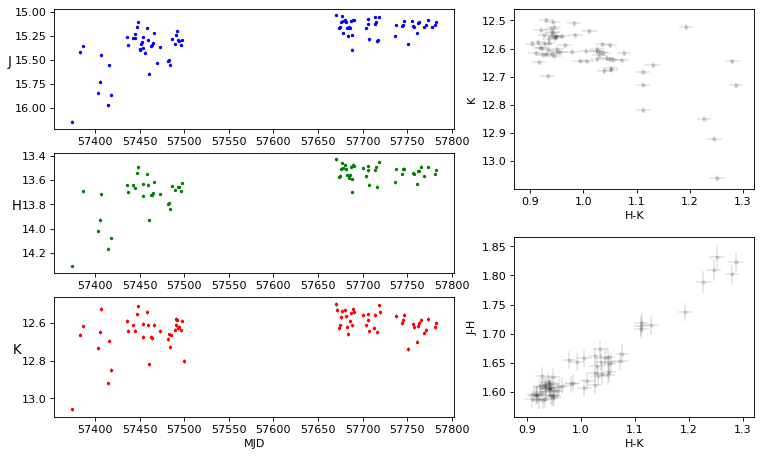

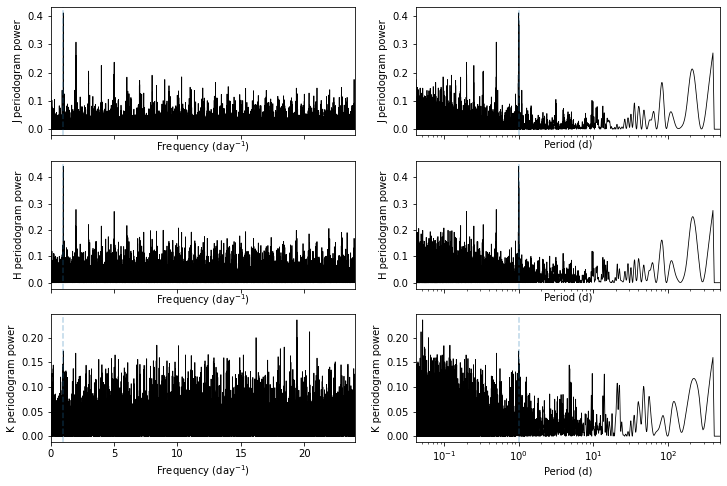

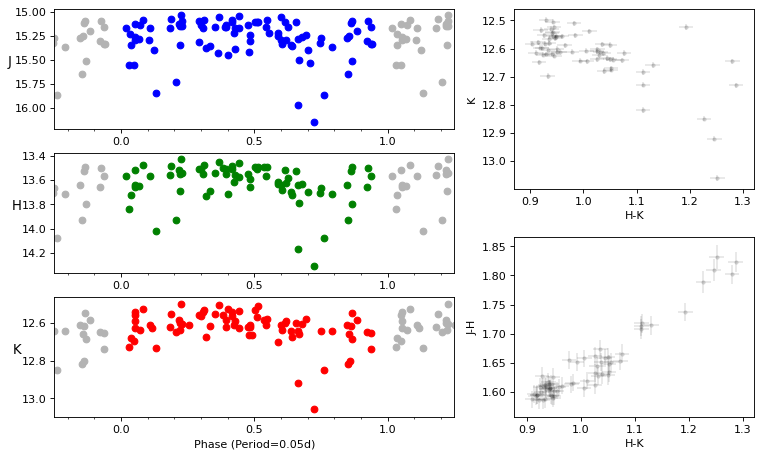

SID: 4519 5940 8898 77
FAP of J peak: 1.36e-08. Freq: 1.00 day^-1 (Period: 24.05 hours)
FAP of H peak: 6.29e-13. Freq: 1.00 day^-1 (Period: 23.89 hours)
FAP of K peak: 6.27e-20. Freq: 1.00 day^-1 (Period: 23.89 hours)


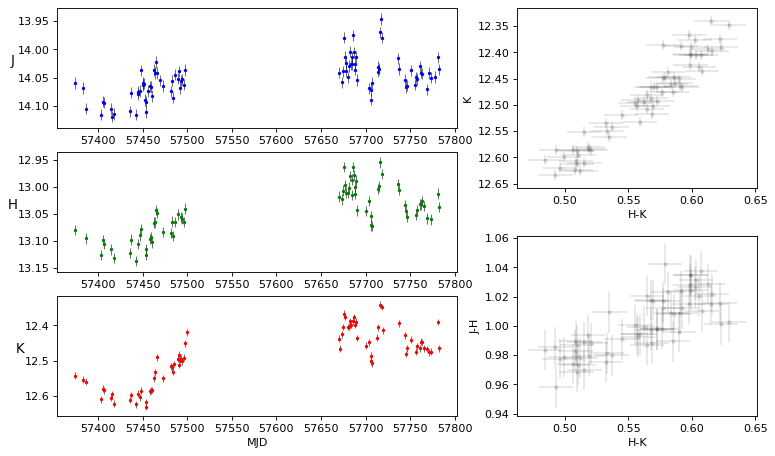

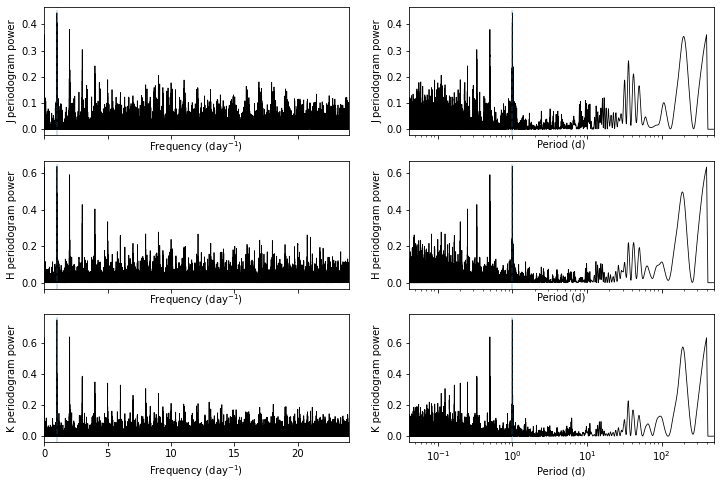

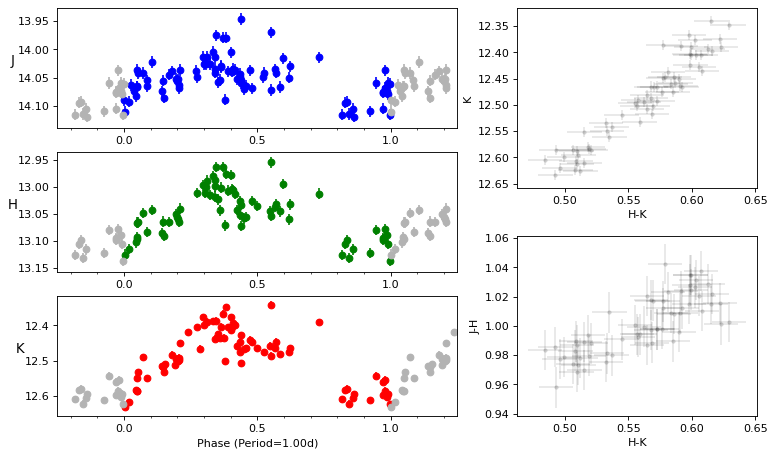

SID: 4519 5940 8898 83
FAP of J peak: 1.84e-01. Freq: 21.81 day^-1 (Period: 1.10 hours)
FAP of H peak: 1.85e-02. Freq: 11.08 day^-1 (Period: 2.17 hours)
FAP of K peak: 1.06e-02. Freq: 0.03 day^-1 (Period: 761.90 hours)


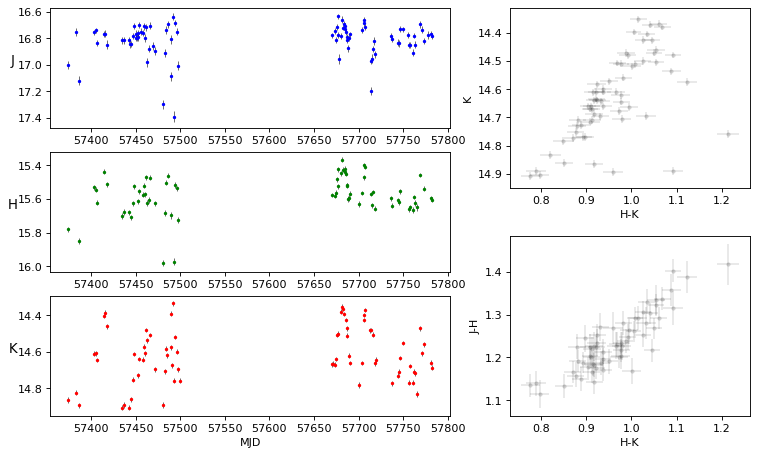

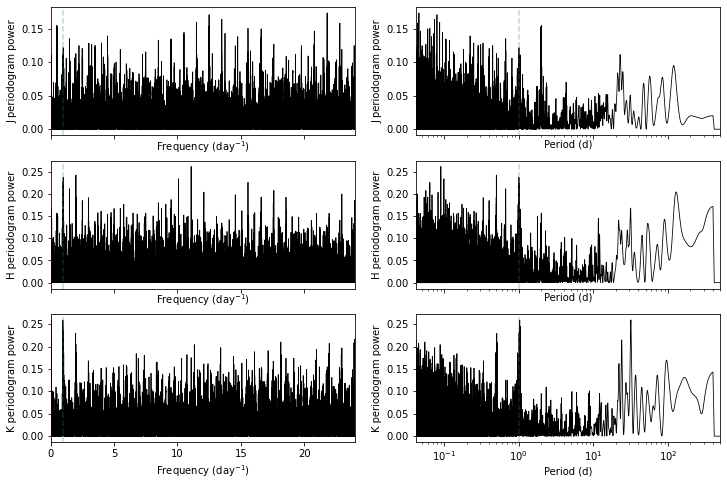

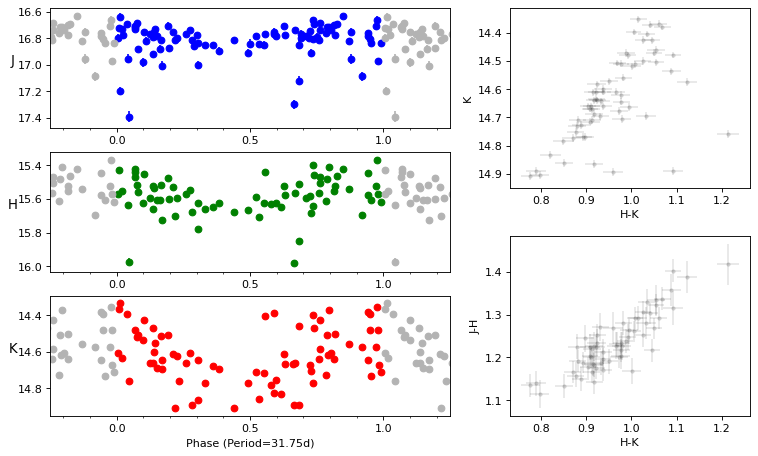

SID: 4519 5940 8899 48
FAP of J peak: 9.25e-02. Freq: 19.46 day^-1 (Period: 1.23 hours)
FAP of H peak: 4.21e-03. Freq: 18.46 day^-1 (Period: 1.30 hours)
FAP of K peak: 1.32e-03. Freq: 6.03 day^-1 (Period: 3.98 hours)


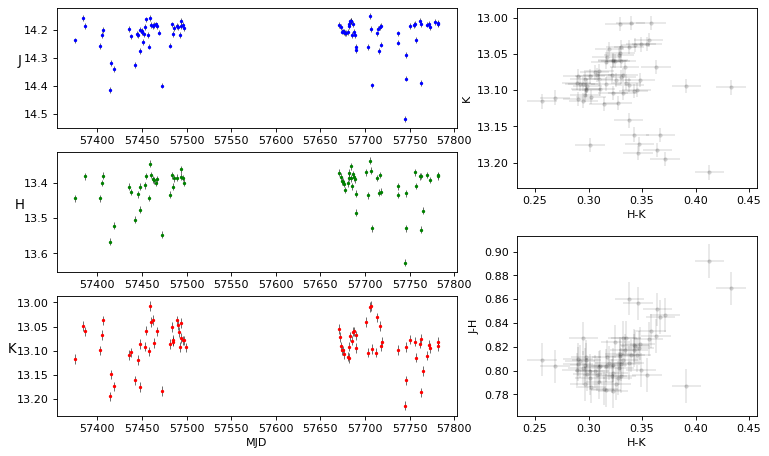

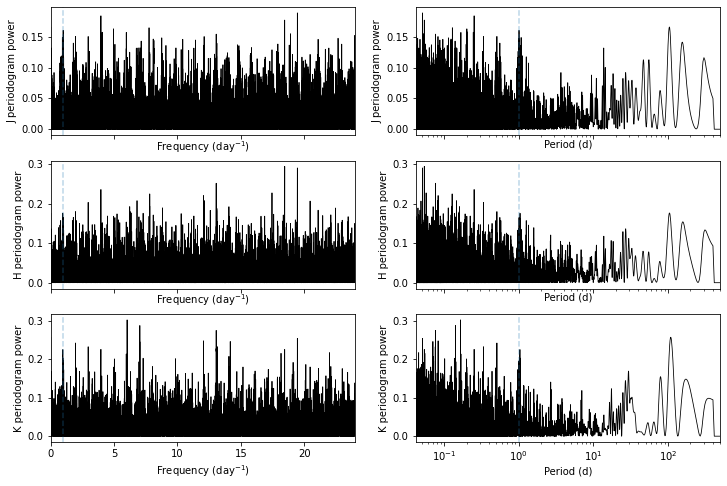

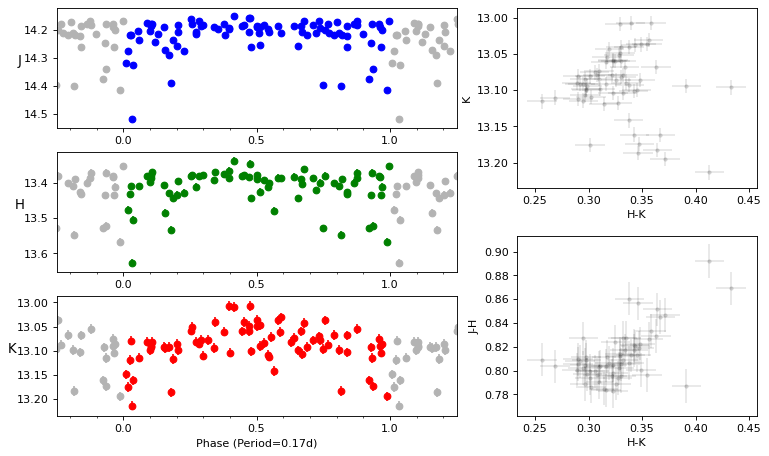

SID: 4519 5940 8900 03
FAP of J peak: 8.23e-02. Freq: 2.47 day^-1 (Period: 9.70 hours)
FAP of H peak: 3.03e-02. Freq: 12.77 day^-1 (Period: 1.88 hours)
FAP of K peak: 1.37e-03. Freq: 3.94 day^-1 (Period: 6.09 hours)


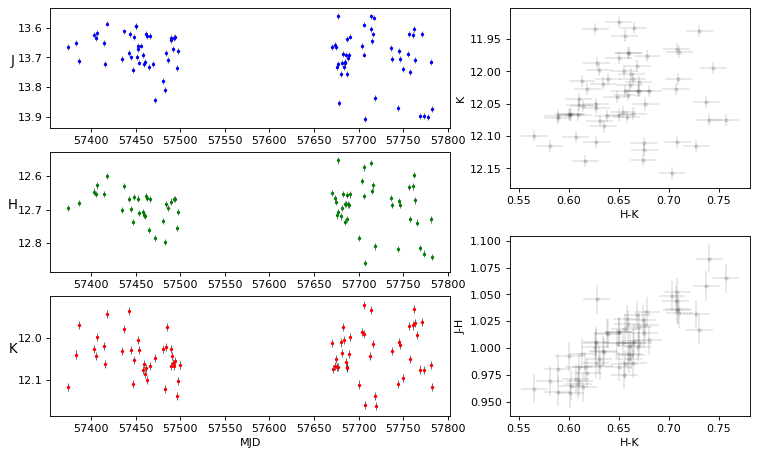

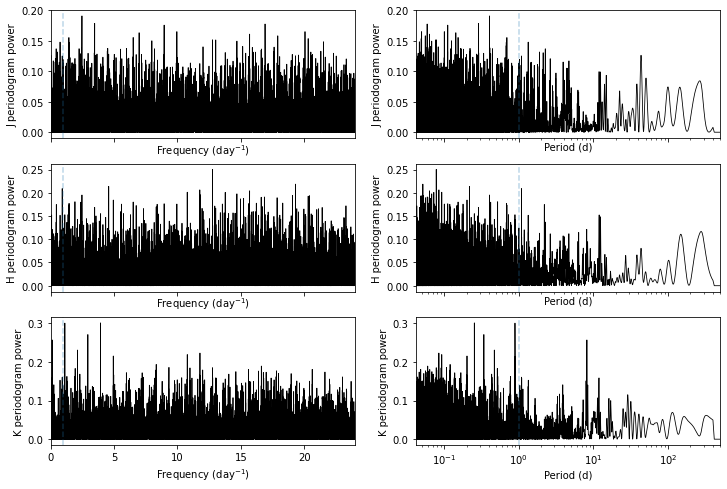

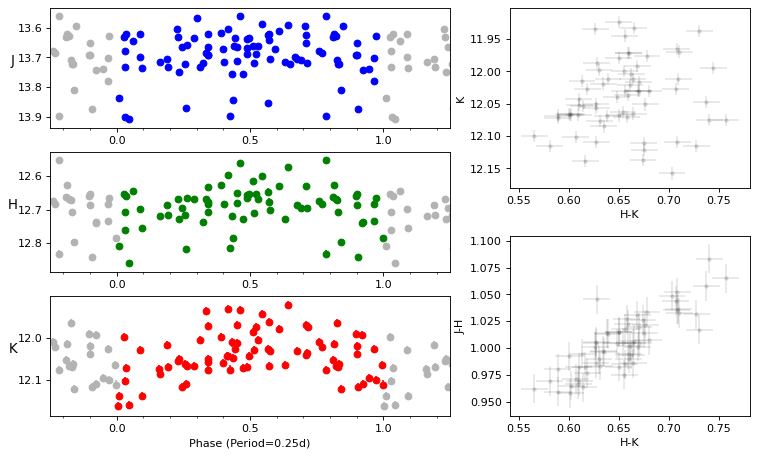

SID: 4519 5940 8900 28
FAP of J peak: 2.03e-19. Freq: 0.11 day^-1 (Period: 226.63 hours)
FAP of H peak: 8.54e-18. Freq: 0.11 day^-1 (Period: 226.63 hours)
FAP of K peak: 3.29e-10. Freq: 0.11 day^-1 (Period: 227.06 hours)


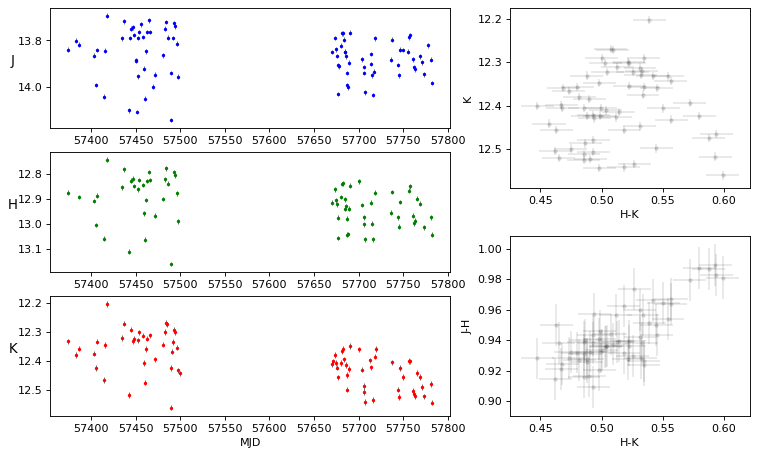

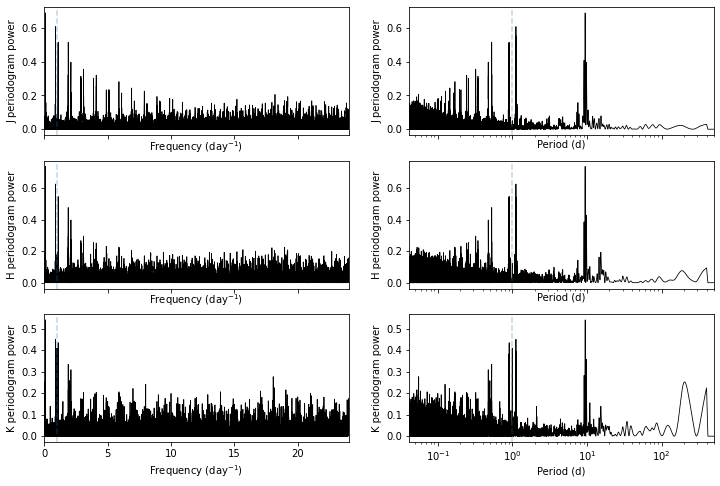

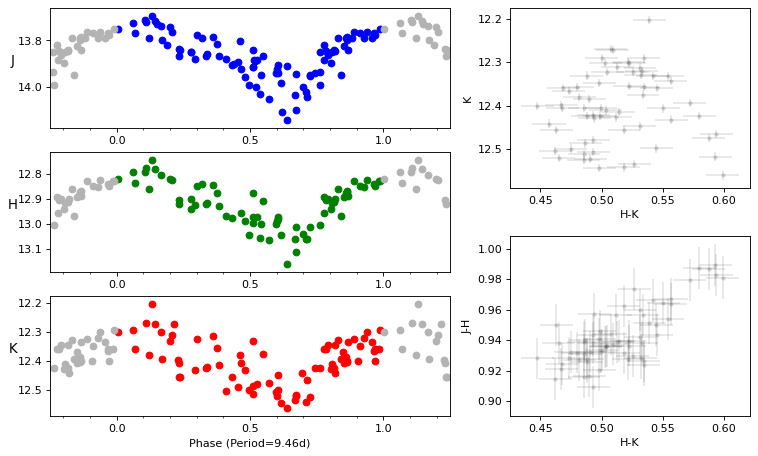

SID: 4519 5940 8901 16
FAP of J peak: 2.38e-02. Freq: 22.56 day^-1 (Period: 1.06 hours)
FAP of H peak: 5.09e-02. Freq: 15.12 day^-1 (Period: 1.59 hours)
FAP of K peak: 5.35e-02. Freq: 3.12 day^-1 (Period: 7.70 hours)


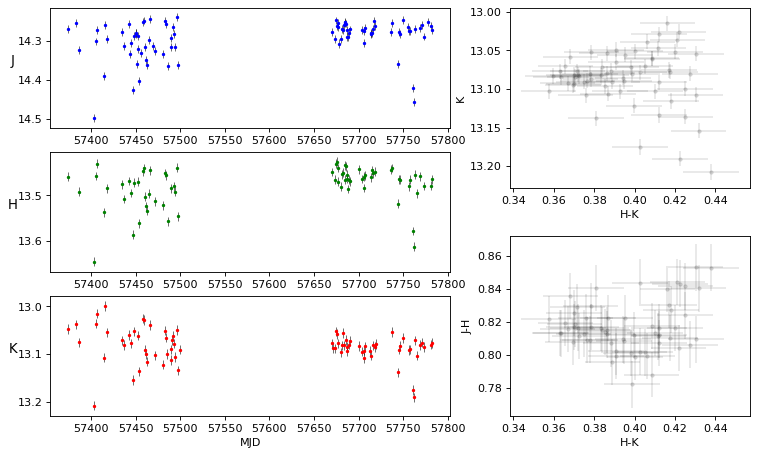

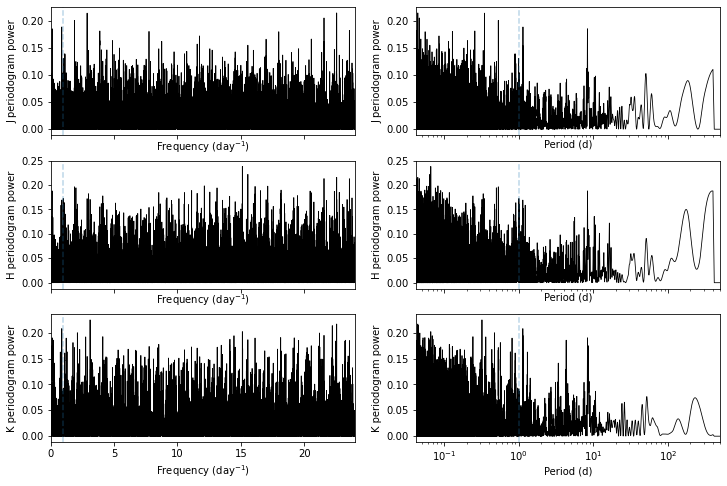

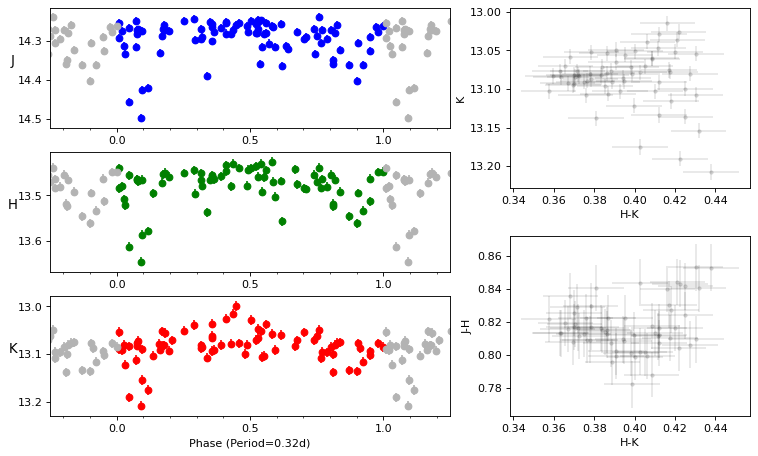

SID: 4519 5940 8901 40
FAP of J peak: 1.54e-05. Freq: 0.17 day^-1 (Period: 140.76 hours)
FAP of H peak: 5.89e-03. Freq: 0.17 day^-1 (Period: 140.60 hours)
FAP of K peak: 3.53e-03. Freq: 1.04 day^-1 (Period: 23.15 hours)


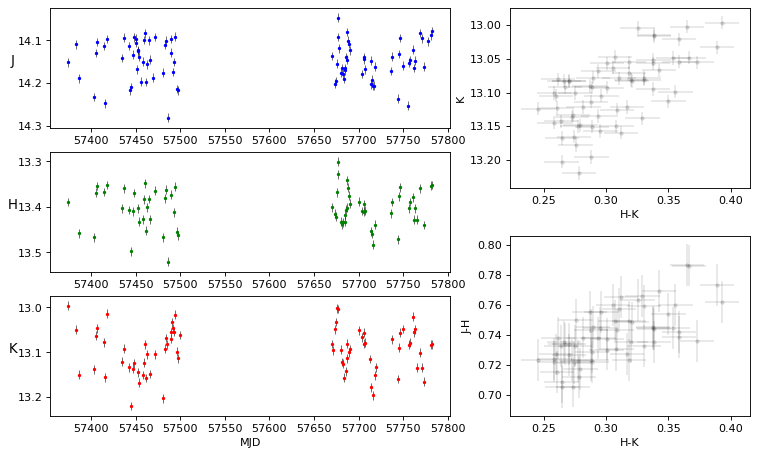

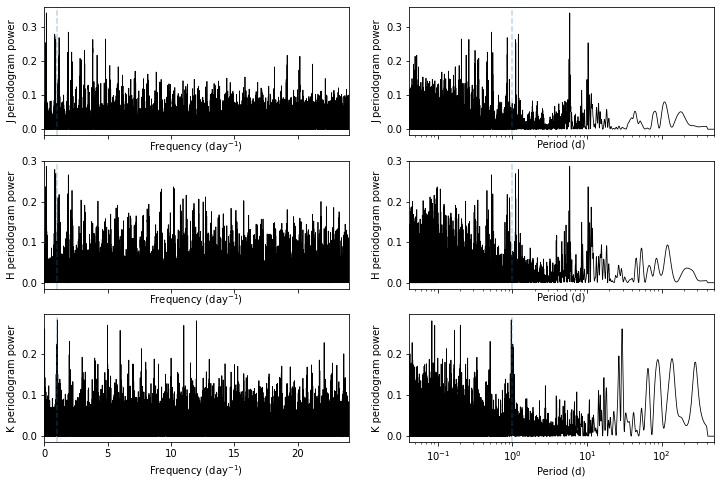

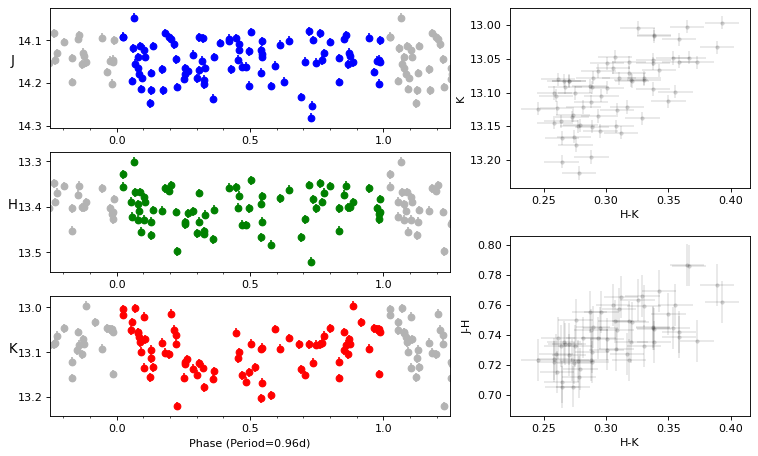

SID: 4519 5940 8901 56
FAP of J peak: 1.57e-04. Freq: 1.00 day^-1 (Period: 23.91 hours)
FAP of H peak: 5.90e-05. Freq: 1.00 day^-1 (Period: 24.05 hours)
FAP of K peak: 1.95e-01. Freq: 9.74 day^-1 (Period: 2.46 hours)


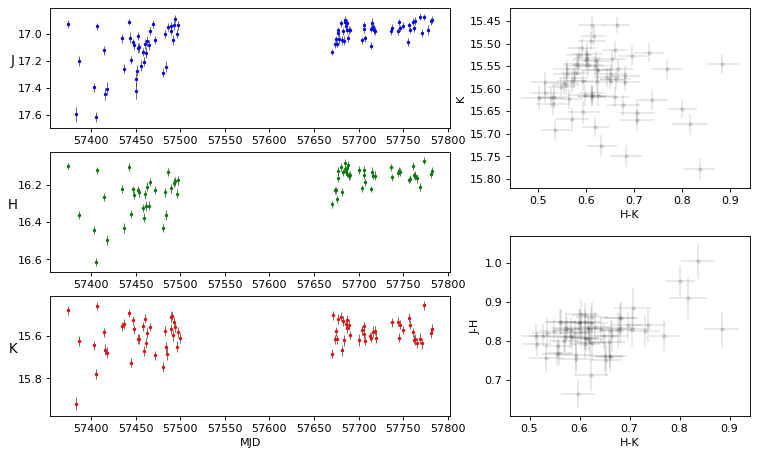

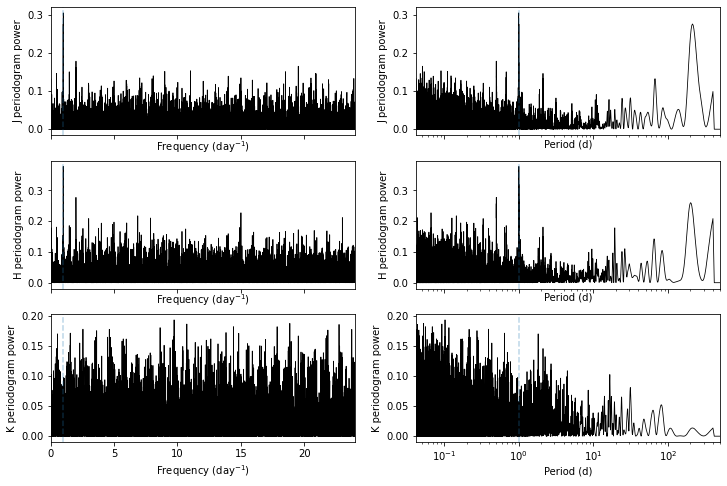

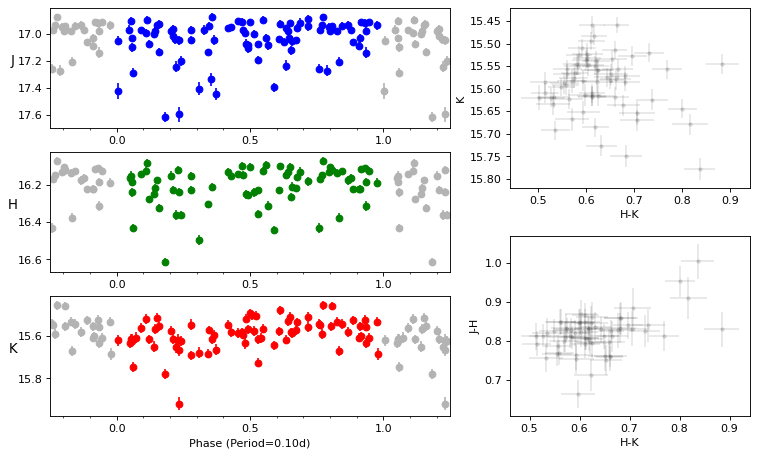

SID: 4519 5940 8902 12
FAP of J peak: 1.76e-05. Freq: 1.00 day^-1 (Period: 23.98 hours)
FAP of H peak: 5.29e-05. Freq: 1.00 day^-1 (Period: 23.98 hours)
FAP of K peak: 1.45e-07. Freq: 0.02 day^-1 (Period: 995.85 hours)


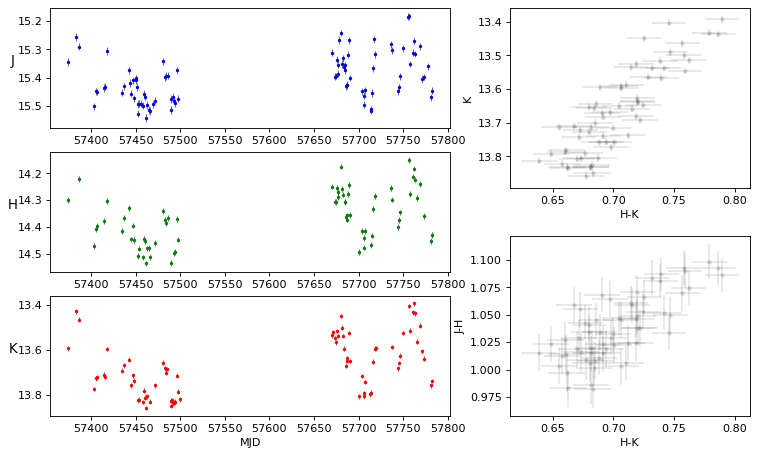

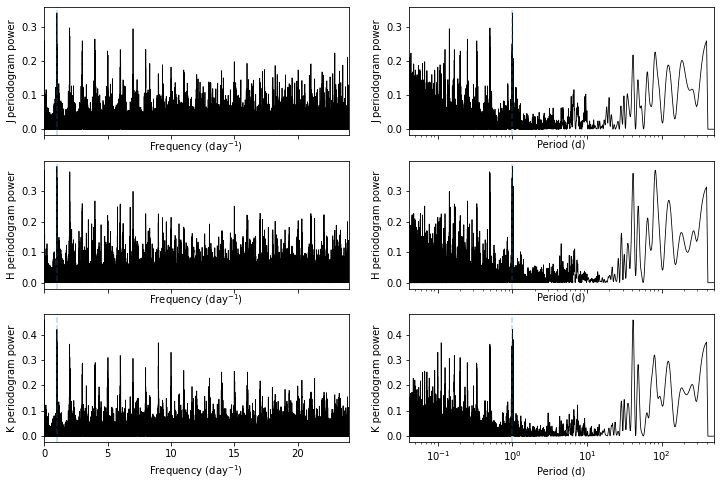

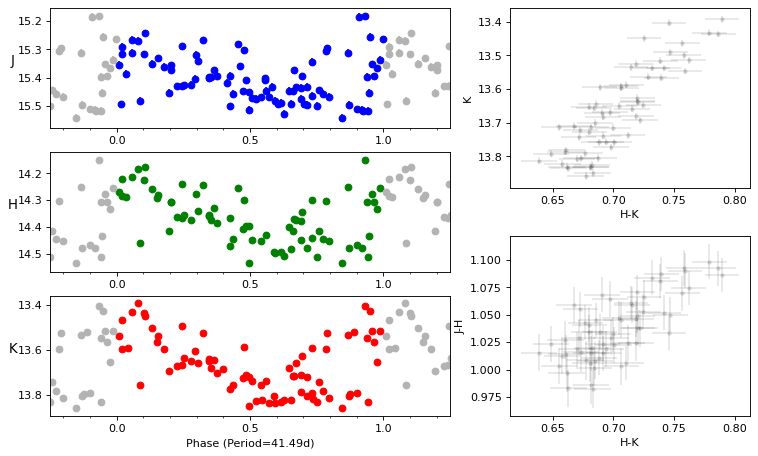

SID: 4519 5940 8902 47
FAP of J peak: 1.98e-02. Freq: 17.11 day^-1 (Period: 1.40 hours)
FAP of H peak: 6.10e-03. Freq: 16.11 day^-1 (Period: 1.49 hours)
FAP of K peak: 9.39e-06. Freq: 2.00 day^-1 (Period: 12.01 hours)


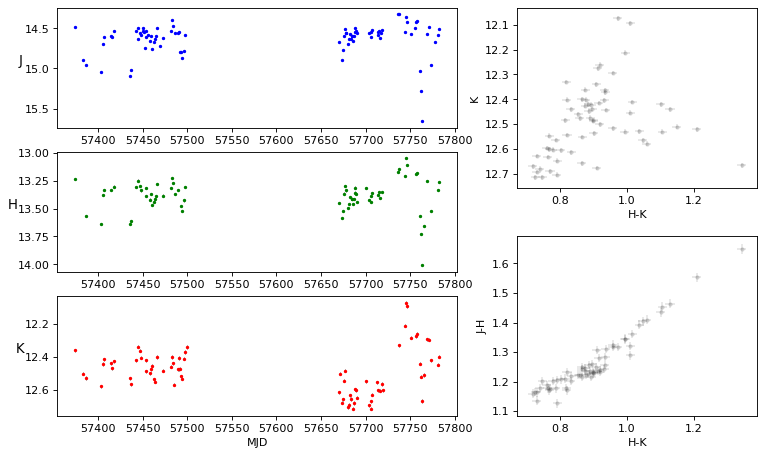

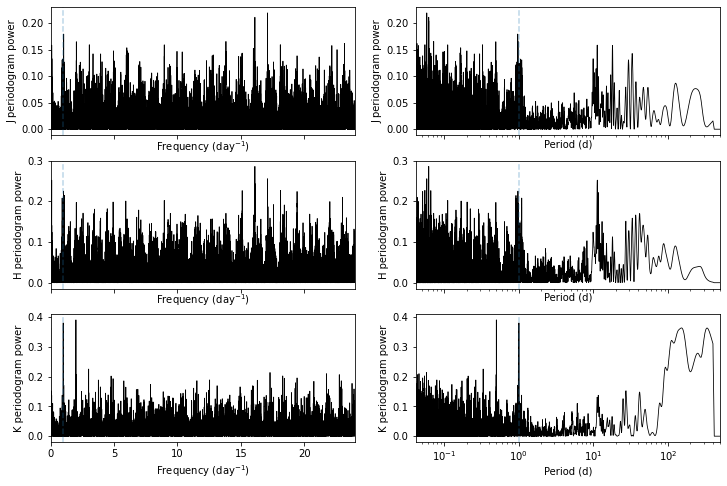

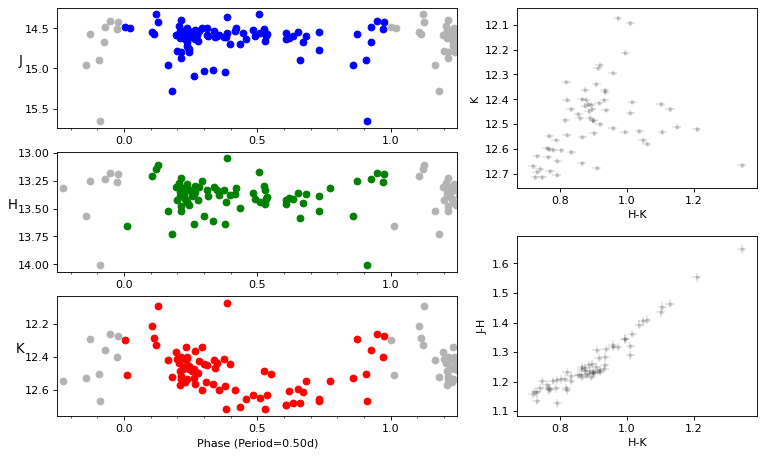

SID: 4519 5940 8902 51
FAP of J peak: 1.06e-12. Freq: 0.34 day^-1 (Period: 70.44 hours)
FAP of H peak: 1.90e-12. Freq: 0.34 day^-1 (Period: 70.44 hours)
FAP of K peak: 2.14e-15. Freq: 0.34 day^-1 (Period: 70.44 hours)


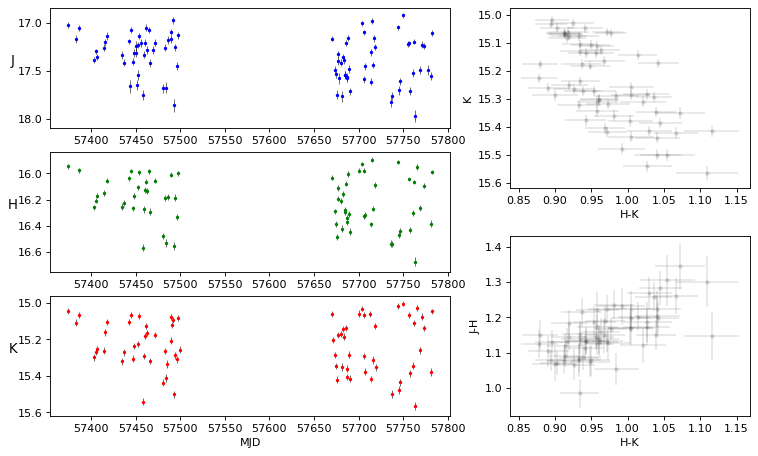

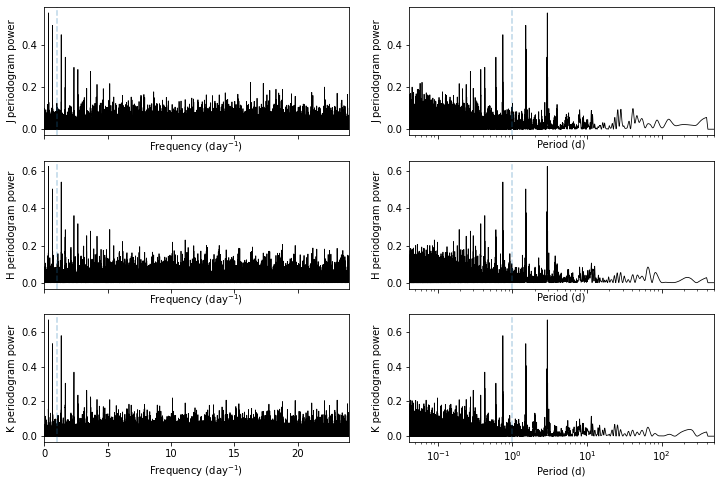

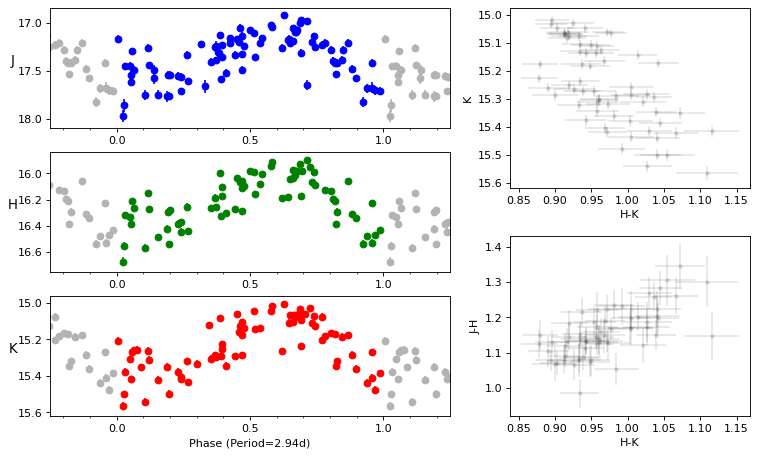

SID: 4519 5940 8904 33
FAP of J peak: 2.22e-03. Freq: 0.79 day^-1 (Period: 30.43 hours)
FAP of H peak: 3.07e-02. Freq: 0.79 day^-1 (Period: 30.42 hours)
FAP of K peak: 2.47e-02. Freq: 11.36 day^-1 (Period: 2.11 hours)


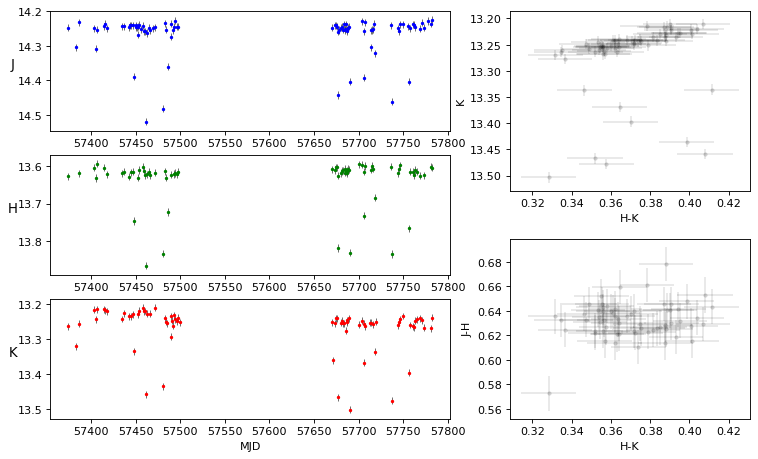

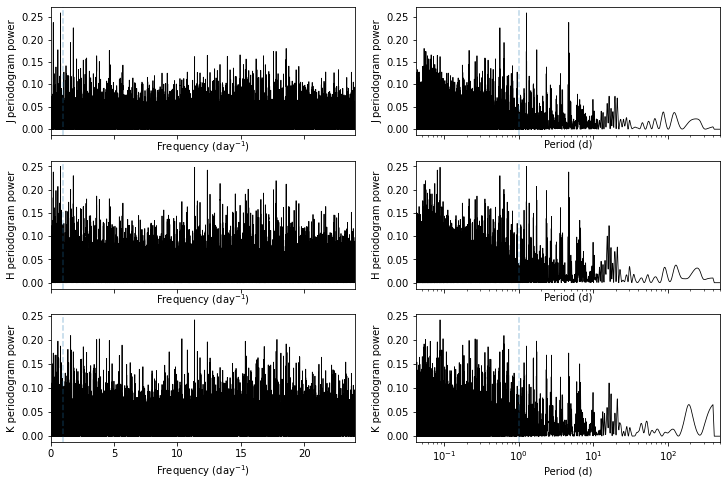

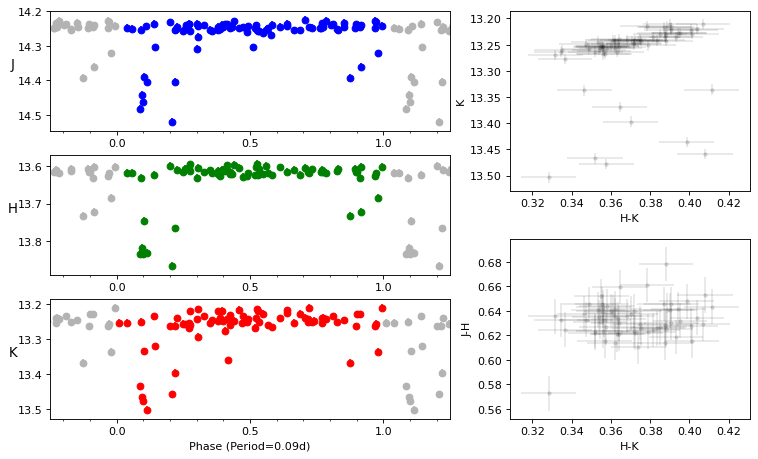

SID: 4519 5940 8904 84
FAP of J peak: 5.51e-04. Freq: 0.84 day^-1 (Period: 28.68 hours)
FAP of H peak: 2.39e-03. Freq: 0.17 day^-1 (Period: 144.66 hours)
FAP of K peak: 1.93e-05. Freq: 3.02 day^-1 (Period: 7.95 hours)


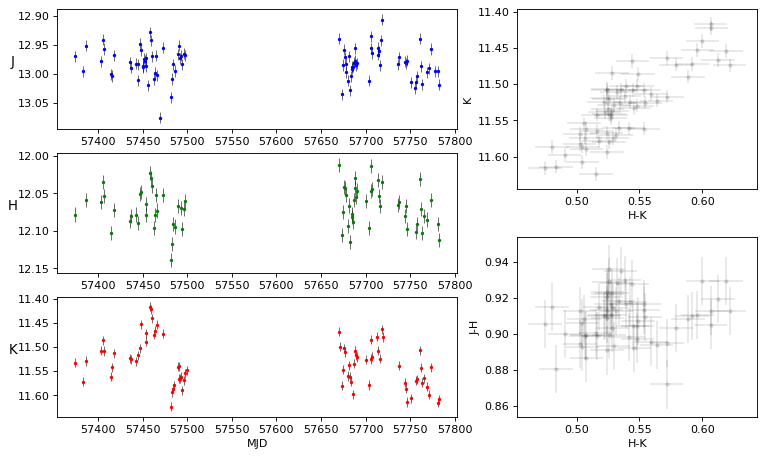

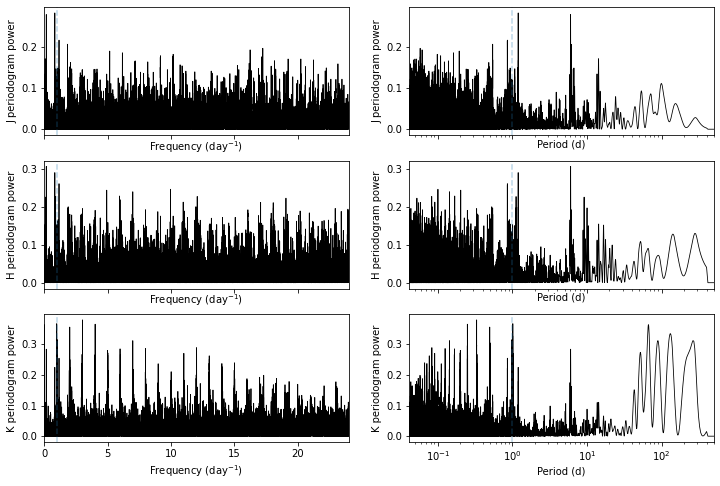

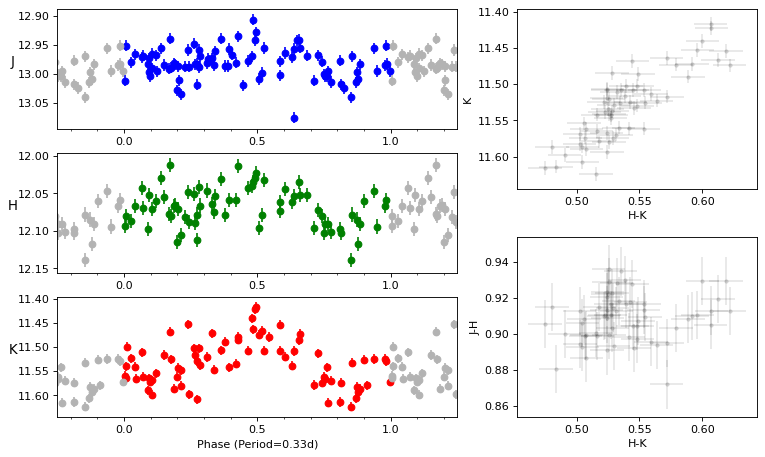

SID: 4519 5940 8905 50
FAP of J peak: 1.02e-03. Freq: 0.99 day^-1 (Period: 24.21 hours)
FAP of H peak: 9.46e-02. Freq: 0.99 day^-1 (Period: 24.31 hours)
FAP of K peak: 2.30e-02. Freq: 5.76 day^-1 (Period: 4.17 hours)


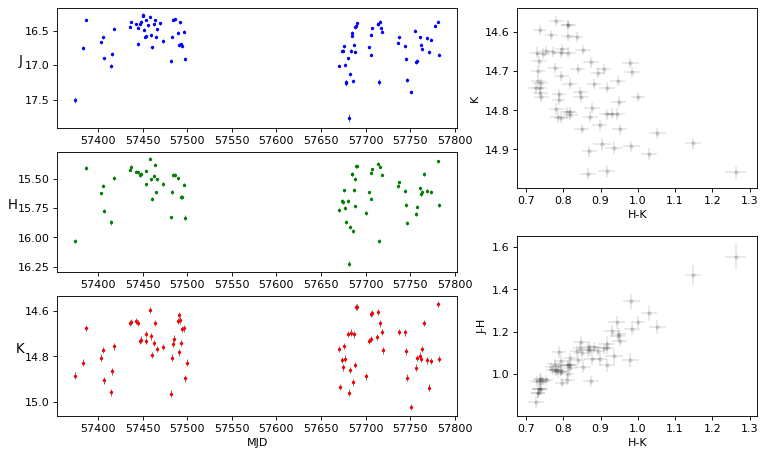

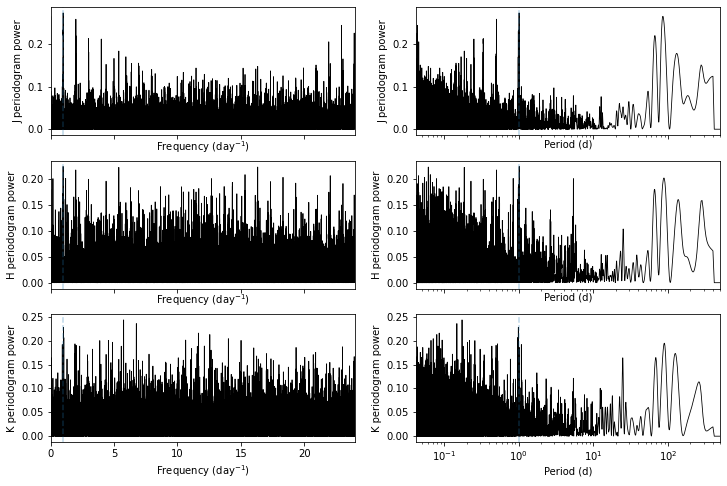

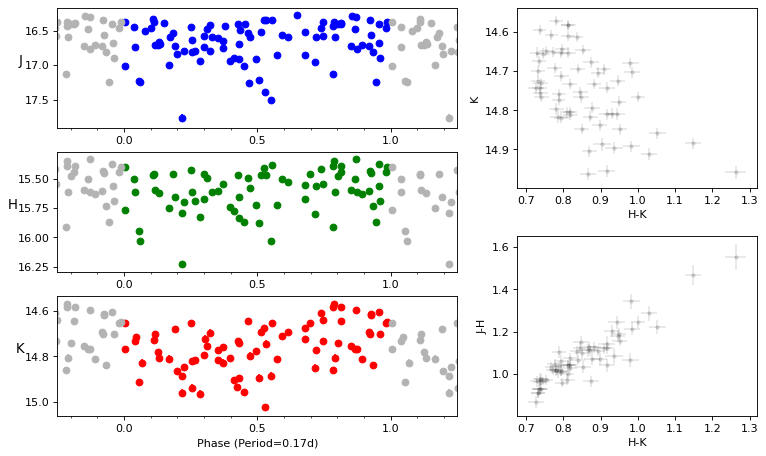

SID: 4519 5940 8906 71
FAP of J peak: 7.49e-02. Freq: 2.77 day^-1 (Period: 8.66 hours)
FAP of H peak: 6.98e-02. Freq: 1.77 day^-1 (Period: 13.56 hours)
FAP of K peak: 6.77e-02. Freq: 7.71 day^-1 (Period: 3.11 hours)


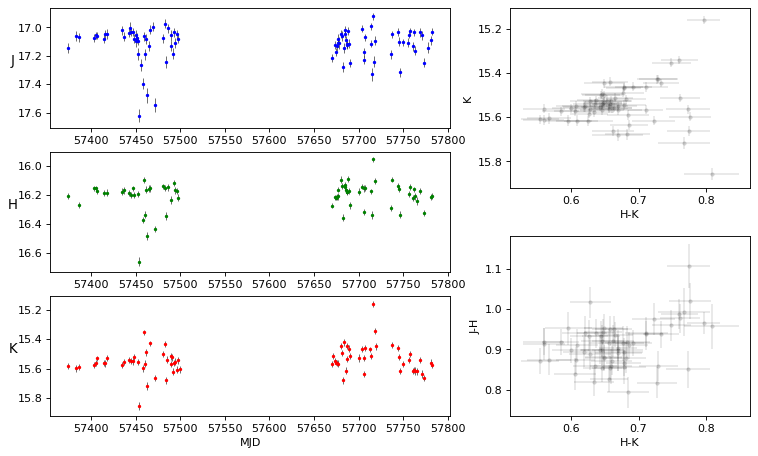

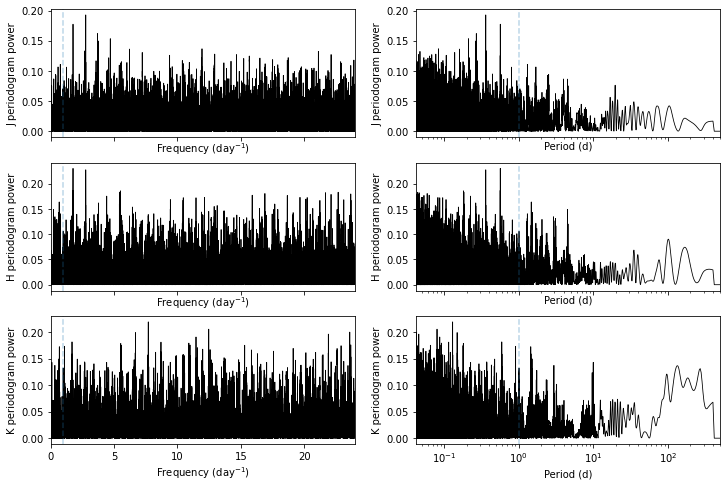

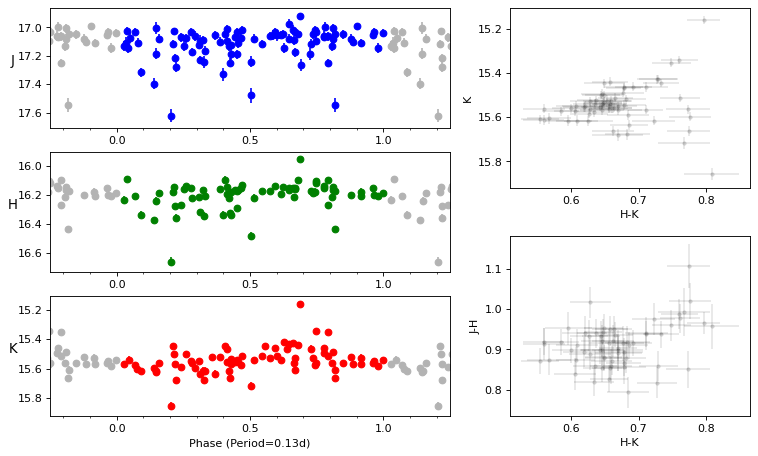

SID: 4519 5940 8907 08
FAP of J peak: 4.79e-08. Freq: 0.01 day^-1 (Period: 4444.43 hours)
FAP of H peak: 2.59e-06. Freq: 0.01 day^-1 (Period: 4528.28 hours)
FAP of K peak: 1.12e-03. Freq: 2.00 day^-1 (Period: 11.99 hours)


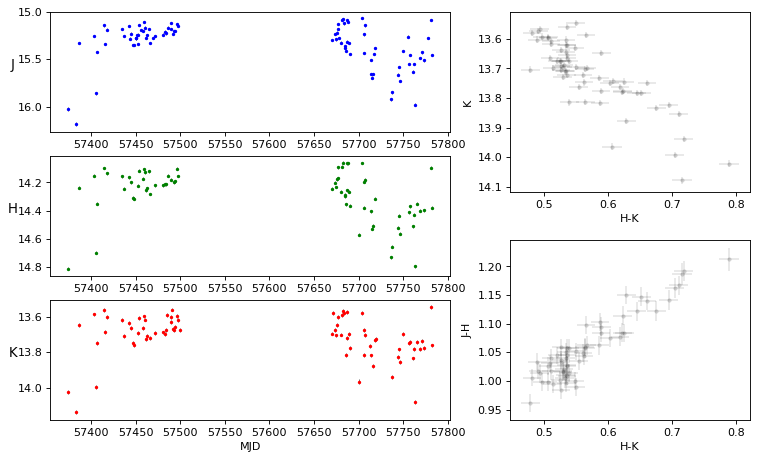

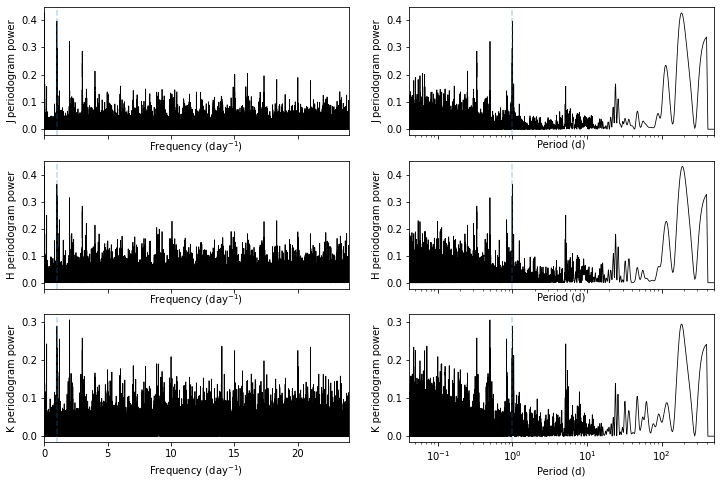

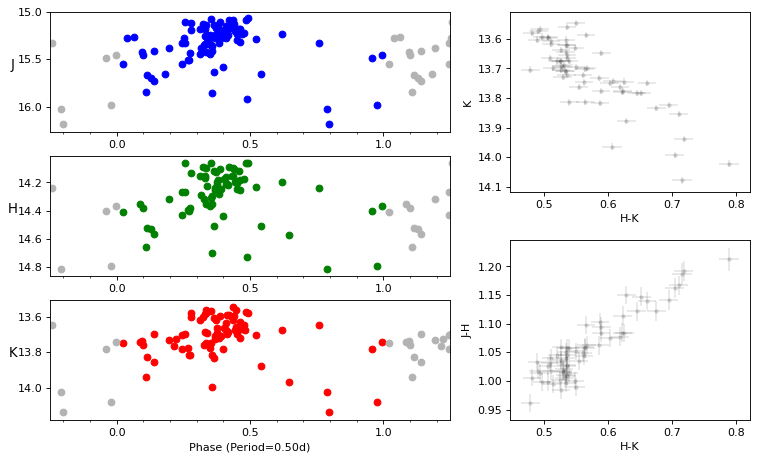

SID: 4519 5940 8925 64
FAP of J peak: 2.35e-04. Freq: 0.39 day^-1 (Period: 61.95 hours)
FAP of H peak: 2.03e-04. Freq: 1.39 day^-1 (Period: 17.30 hours)
FAP of K peak: 2.30e-03. Freq: 20.85 day^-1 (Period: 1.15 hours)


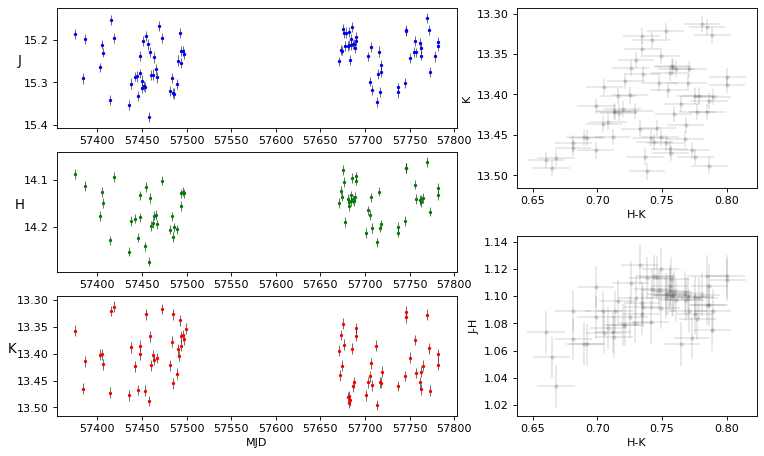

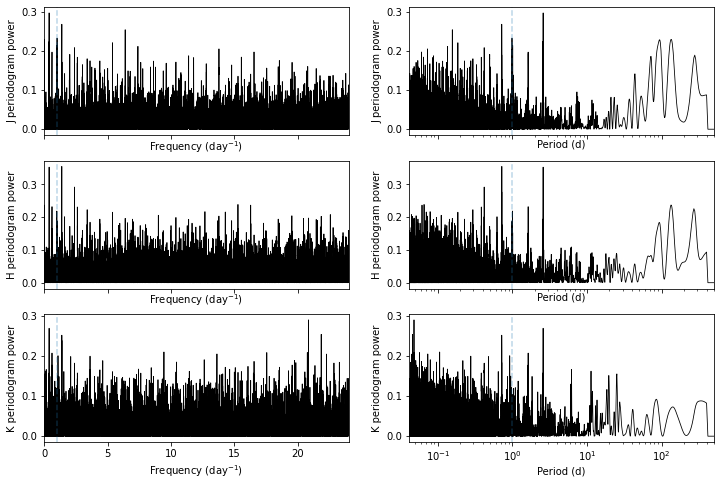

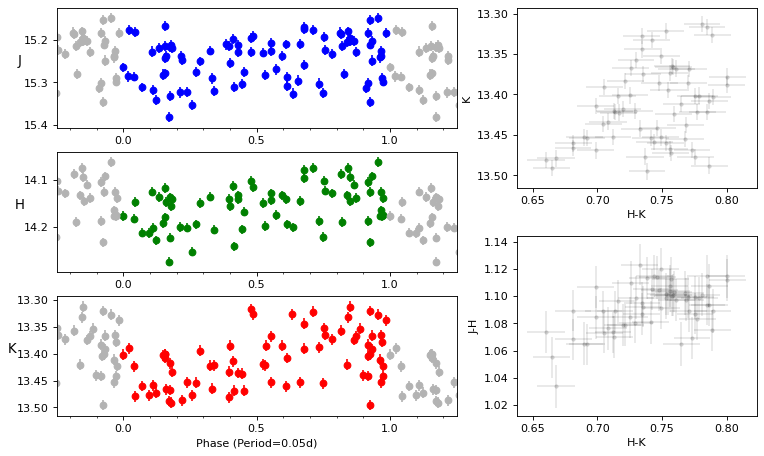

SID: 4519 5940 8934 36
FAP of J peak: 5.16e-20. Freq: 1.60 day^-1 (Period: 14.99 hours)
FAP of H peak: 1.87e-20. Freq: 1.60 day^-1 (Period: 14.99 hours)
FAP of K peak: 3.20e-23. Freq: 1.60 day^-1 (Period: 14.99 hours)


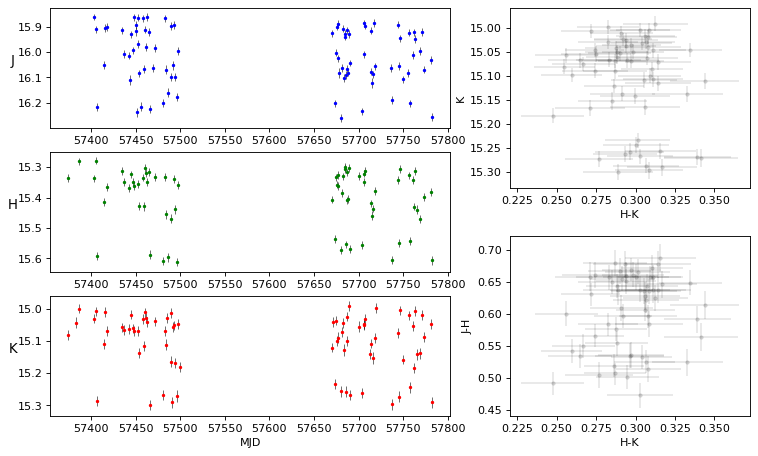

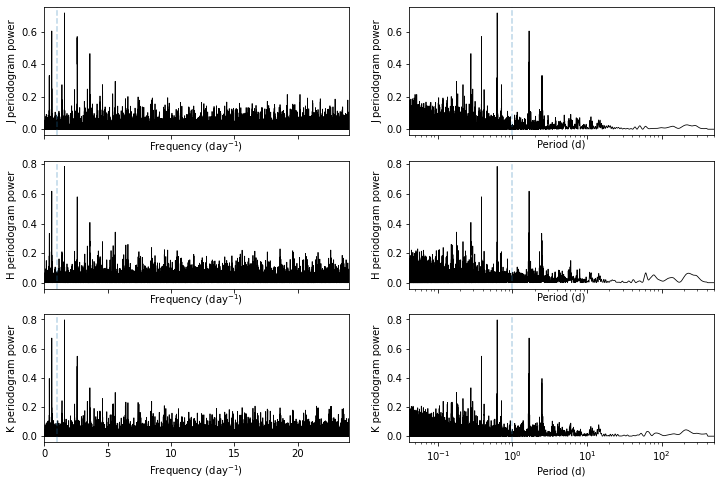

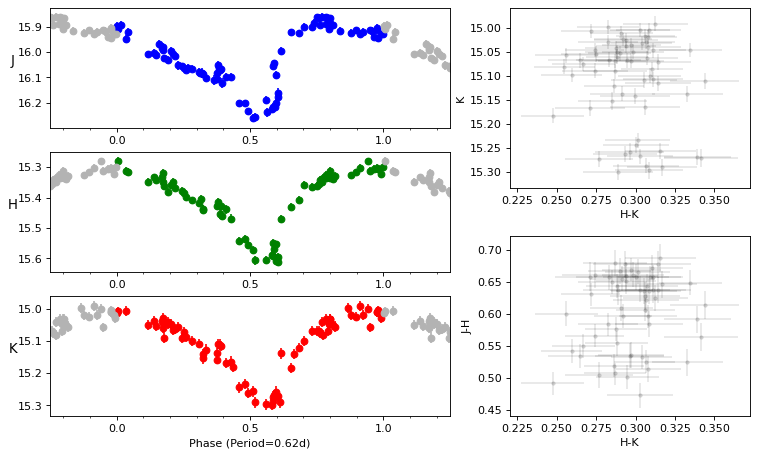

SID: 4519 5940 8971 03
FAP of J peak: 8.23e-24. Freq: 0.28 day^-1 (Period: 86.70 hours)
FAP of H peak: 3.29e-25. Freq: 0.28 day^-1 (Period: 86.67 hours)
FAP of K peak: 5.16e-25. Freq: 0.28 day^-1 (Period: 86.67 hours)


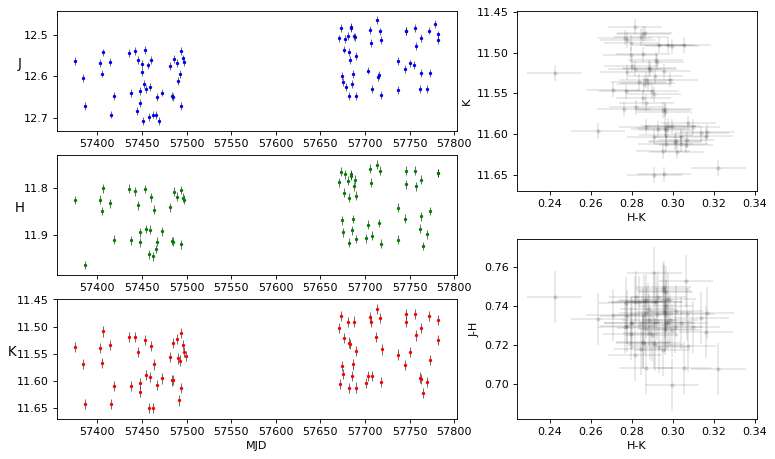

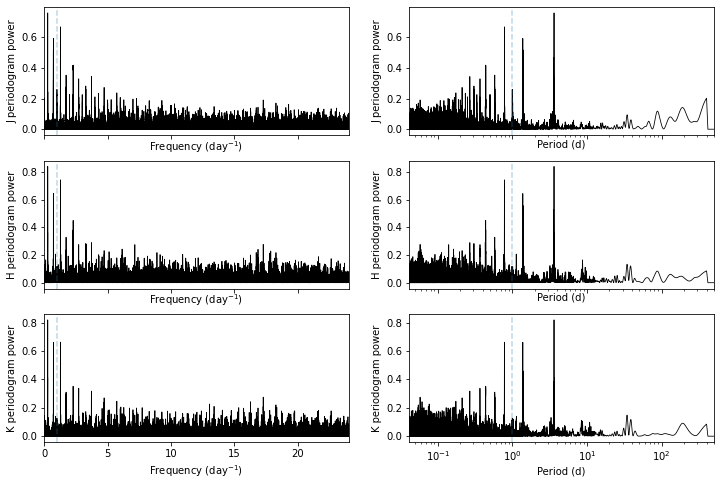

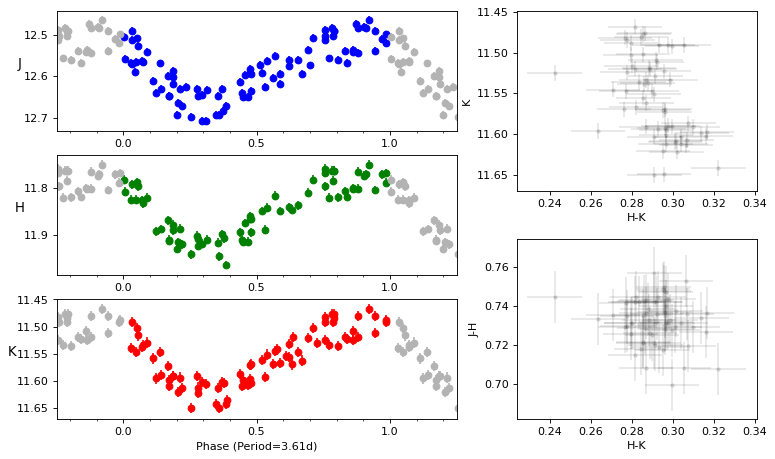

SID: 4519 5940 8976 70
FAP of J peak: 1.08e-02. Freq: 1.99 day^-1 (Period: 12.05 hours)
FAP of H peak: 2.36e-02. Freq: 0.99 day^-1 (Period: 24.28 hours)
FAP of K peak: 8.48e-05. Freq: 1.01 day^-1 (Period: 23.88 hours)


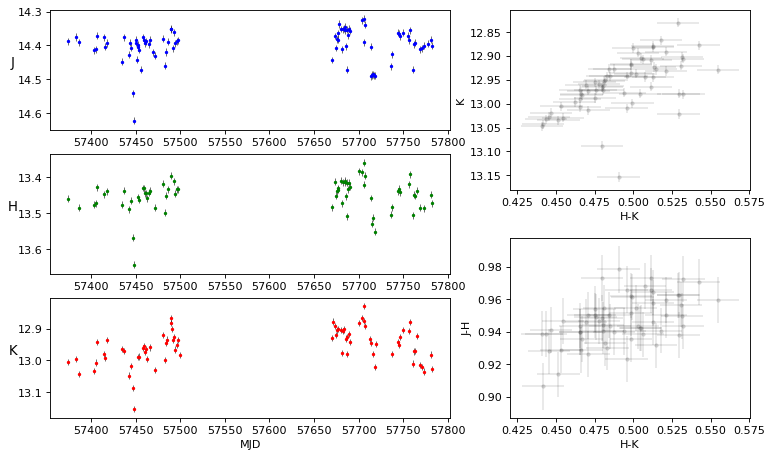

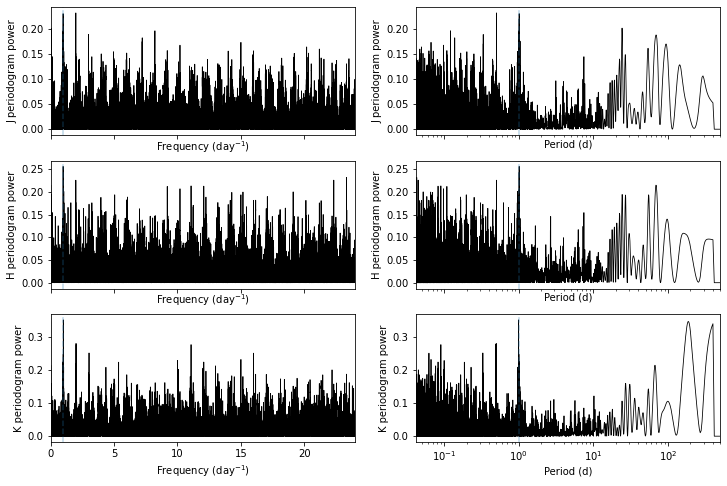

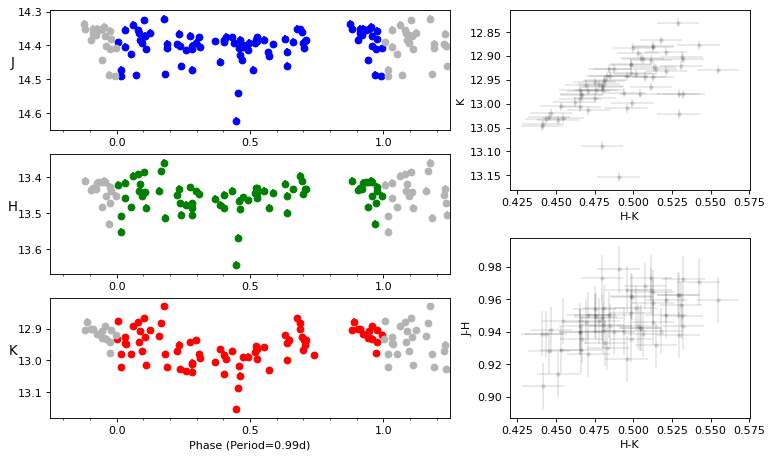

In [35]:
# let's take Mon R2.

import warnings
warnings.filterwarnings("ignore")

q2 = sq2(ds, n_min, n_max)
v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)

variable_sids = spread['wserv11'][q2 & v2].index[120:150]

print(variable_sids)

dg = phot_grouped['wserv11']

f_min = 0
f_max = 24
N_eval = int(2.4e5)

freq = np.linspace(f_min, f_max, N_eval)

for sid in variable_sids:
    
    print(f"SID: {sidsep(sid)}")
    
    simple_lc(dg, sid)
    
    # grab the grouped photometry data
    
    dat = dg.groups[dg.groups.keys["SOURCEID"] == sid]

    
    # apply lomb-scargle to J, H, and K
    
    # plot the periodograms.
    
    fig, axes = plt.subplots(nrows=3, ncols=2, sharex='col', figsize=(12,8))
    
    bands = ['J', 'H', 'K']
    
    for (band, (ax, ax_p)) in zip(bands, axes):
                
        dates = dat['MEANMJDOBS'][~np.isnan(dat[f"{band}APERMAG3"])]
        mags = dat[f"{band}APERMAG3"][~np.isnan(dat[f"{band}APERMAG3"])]
        errs = dat[f"{band}APERMAG3ERR"][~np.isnan(dat[f"{band}APERMAG3"])]

        # compute a lomb scargle
        ls = LombScargle(dates, mags, dy=errs)
        power = ls.power(freq)
        
        min_freq = 1/400
        power[freq<min_freq] = 0
        
        # plot it.
        ax.plot(freq, power, 'k', lw=0.8)
        ax.set_xlim(freq.min(), freq.max())
        ax.set_ylabel(f"{band} periodogram power")
        ax.set_xlabel("Frequency (day$^{-1}$)")
        ax.axvline(1, ls='--', alpha=0.3)

        # plot it.
        ax_p.plot(1/freq, power, 'k', lw=0.8)
        ax_p.set_ylabel(f"{band} periodogram power")
        ax_p.set_xlabel("Period (d)")
        ax_p.set_xscale("log")
        ax_p.set_xlim(1/24, 500)
        ax_p.axvline(1, ls='--', alpha=0.3)
        
        
        fmax = freq[np.nanargmax(power)]
        fap = ls.false_alarm_probability(np.nanmax(power))
        print(f"FAP of {band} peak: {fap:.2e}. Freq: {fmax:.2f} day^-1 (Period: {24. / fmax:.2f} hours)")
#         print(f"Strongest period at {band}: {24. / fmax:.2f} hours")
        
    simple_phased_lc(dg, sid, 1/fmax)
        
    plt.show()


# sin_mags = mags + np.sin(times*24)

# ls = LombScargle(times, sin_mags)

# # note: this lets the mean float by default
# power = LombScargle(times, sin_mags).power(freq) 
# # freq, power = ls.autopower(minimum_frequency=0, maximum_frequency=35)

# fmax = freq[np.nanargmax(power)]
# print(f"Strongest frequency: {fmax:.2f} day^-1")
# print(f"Strongest period: {24. / fmax:.2f} hours")

In [9]:
freq = np.linspace(0., 24., int(2.4e5) )
freq

array([0.00000000e+00, 1.00000417e-04, 2.00000833e-04, ...,
       2.39998000e+01, 2.39999000e+01, 2.40000000e+01])

In [10]:
LombScargle?

In [19]:
plt.subplots?

In [30]:
plt.axvline?